# Capstone Project

##  Exploring neighborhoods in Toronto to find the neighborhood with the best Vegan Restaurant options

First we will start by extracting data related to neighborhoods in Toronto. This information is readily available on Wikipedia.

In [1]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Foursquare Client Information

In [2]:
# client info
CLIENT_ID = 'TTEYGX0LFVPEVVOK01103USAWAFK35EH2AIBWYMKBTA0HTRU' # your Foursquare ID
CLIENT_SECRET = 'UNP2CXDYA0NIOCDQ0KJFCXLVJED0E00Z4YMRRGAJCPCCXCV3' # your Foursquare Secret
VERSION = '20200328' # Foursquare API version

In [3]:
#!python3 -m pip install lxml  ## Uncomment if missing library

Note: An older revision of the Wikipedia page is being used to extract this data due to the optimal formatting present on this page.

In [4]:
url = "https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=942655364"

We are using Pandas **read_html** method to extract the data

In [5]:
# Using pandas read_html to extract tables from url
url_tables = pd.read_html(url)

In [6]:
# Getting our required table and storing it in dataframe
codes_df = url_tables[0]
codes_df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Some postal codes are associated with multiple neighborhood and therefore there is multiple entries for those postal codes. In the code below, we will use dataframe **group_by** function to group the data by Postal Codes and Borough names. Then we will aggregate the Neighbourhoods using the **agg** function on the group_by object.

In [7]:
codes_df = codes_df.groupby(['Postcode','Borough']).agg(lambda x: ', '.join(x.values))

Resetting index to make Postal Codes and Boroughs into columns

In [8]:
codes_df = codes_df.reset_index()

Getting rid of any **Not assigned** postal codes as those do not provide any useful information

In [9]:
codes_df = codes_df.where(codes_df['Borough']!="Not assigned").dropna()
codes_df

,Postcode,Borough,Neighbourhood
1,M1B,Scarborough,"Rouge, Malvern"
2,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
3,M1E,Scarborough,"Guildwood, Morningside, West Hill"
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae
6,M1J,Scarborough,Scarborough Village
7,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
8,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
9,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
10,M1N,Scarborough,"Birch Cliff, Cliffside West"


Renaming the Column

In [10]:
codes_df.rename(columns={'Postcode':'PostalCode'},inplace=True)
codes_df.head()

,PostalCode,Borough,Neighbourhood
1,M1B,Scarborough,"Rouge, Malvern"
2,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
3,M1E,Scarborough,"Guildwood, Morningside, West Hill"
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae


In [11]:
codes_df.shape

(103, 3)

Next we will get the latitude and longitude data from the CSV file online

In [12]:
import requests
url = 'http://cocl.us/Geospatial_data'
r = requests.get(url, allow_redirects=True)
open('geo.csv', 'wb').write(r.content)

2891

We will now read the CSV file into a dataframe 

In [13]:
geo_df = pd.read_csv('geo.csv')
geo_df.rename(columns={'Postal Code':'PostalCode'},inplace=True)
geo_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


We will now use **pd.merge** to left join the toronto neighborhood dataframe with the geo dataframe on Postal Code field

In [14]:
toronto_df = pd.merge(codes_df, geo_df, how='left', on='PostalCode')
toronto_df.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Now we will write a function that finds nearby restaurants for a particular location (latitude/longitude). This function uses the Foursquare API and makes calls using the **venues/search** endpoint.

In [15]:
def getNearbyVenues(name, lat, lng, radius=3000, LIMIT=1000):
    
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)
    print(url)

    # make the GET request
    results = requests.get(url).json()["response"]['venues']
    
    
    # return only relevant information for each nearby venue
    venue_list = []
    for v in results:
        try:
            postal_code = v['location']['postalCode'].split(r' ')[0][:3].upper()
            venue_list.append([
                name,
                v['id'],
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],
                postal_code,
                v['categories'][0]['name']])
        except:
            continue
        
   

    nearby_venues = pd.DataFrame([item for item in venue_list])
    print(nearby_venues)
    nearby_venues.columns = ['Neighborhood',
                  'ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'PostalCode',
                  'Venue Category']
    
        
    
    return(nearby_venues)

Loop through neighborhood and search nearby venues based on Latitude and Longitude

In [17]:
toronto_venues = pd.DataFrame(columns=['Neighborhood', 'PostalCode', 'Venue', 'Venue Category',
       'Venue Latitude', 'Venue Longitude'])
for (name,lat,lng) in zip(toronto_df['Neighbourhood'],toronto_df['Latitude'],toronto_df['Longitude']):
    toronto_venues = toronto_venues.append(getNearbyVenues(name,lat,lng),ignore_index=True)

https://api.foursquare.com/v2/venues/search?&client_id=TTEYGX0LFVPEVVOK01103USAWAFK35EH2AIBWYMKBTA0HTRU&client_secret=UNP2CXDYA0NIOCDQ0KJFCXLVJED0E00Z4YMRRGAJCPCCXCV3&v=20200328&ll=43.806686299999996,-79.19435340000001&radius=3000&limit=1000
                 0                         1  \
0   Rouge, Malvern  59dc417d08f521354fd3d5da   
1   Rouge, Malvern  4bb8cc383db7b713099f219a   
2   Rouge, Malvern  59c92a9e35f9830719938444   
3   Rouge, Malvern  5bff1f63d69ed0002cca9a0d   
4   Rouge, Malvern  4b16e23bf964a520edbe23e3   
5   Rouge, Malvern  5df92d51e427d600088060db   
6   Rouge, Malvern  4fa41351e4b012fefc586fd5   
7   Rouge, Malvern  569061a6498edca58a29172c   
8   Rouge, Malvern  55a95494498e787e7c3a37d4   
9   Rouge, Malvern  4bcb612d3740b713f0606265   
10  Rouge, Malvern  4d2c8332342d6dcbe82020cb   
11  Rouge, Malvern  53d2c0d5498ecb061bcce620   
12  Rouge, Malvern  55a919f2498e8f75521a6682   
13  Rouge, Malvern  51a2127e498eae4ebef28b2f   
14  Rouge, Malvern  5e85e7e2d5000e0008

                                    0                         1  \
0   Guildwood, Morningside, West Hill  4f0b08240cd6e04819efa1ce   
1   Guildwood, Morningside, West Hill  4b7431dbf964a5205acc2de3   
2   Guildwood, Morningside, West Hill  4c62f34bde1b2d7fec89e370   
3   Guildwood, Morningside, West Hill  5d97e5e6bcd8a90008e87cbc   
4   Guildwood, Morningside, West Hill  4beee041e24d20a1cd857314   
5   Guildwood, Morningside, West Hill  4d8502e58de9721e4ec93d51   
6   Guildwood, Morningside, West Hill  4d95bd2ddaec224bf7bf043e   
7   Guildwood, Morningside, West Hill  4c1c7f9bb306c9288f0464b7   
8   Guildwood, Morningside, West Hill  5061e52ce4b00bc612f67d12   
9   Guildwood, Morningside, West Hill  4d7171f92868f04d13bf8a07   
10  Guildwood, Morningside, West Hill  5d4afcec6018fe0008c7afd2   
11  Guildwood, Morningside, West Hill  4c2f521816adc9287d4abd9c   
12  Guildwood, Morningside, West Hill  4eb4494af9f40c39c56dd693   
13  Guildwood, Morningside, West Hill  5080348b3d7c3c5c502e887

            0                         1                                     2  \
0   Cedarbrae  5b90f2cbd807ee002cdb2a87                            Cash 4 You   
1   Cedarbrae  4c27da423492a593158cb628                           Thai One On   
2   Cedarbrae  4e11dc3ae4cdef074b76ef16                        MVN Law Office   
3   Cedarbrae  5b9285c6e17910002b6f83d0                         The UPS Store   
4   Cedarbrae  4b1711a6f964a520cbc123e3                   Federick Restaurant   
5   Cedarbrae  5b2fda820dd31f00247a411c                          Maple Clinic   
6   Cedarbrae  52bc672a11d26cd2dc5d6d56                  Klass Protection Ltd   
7   Cedarbrae  4cf987f9c6cca35d2d988032                       TD Canada Trust   
8   Cedarbrae  4e8673fcd66a9b178e912072                          Petro-Canada   
9   Cedarbrae  4e30695388778782371fd2f7                        Uncorked Media   
10  Cedarbrae  551838f6498ee39ec286ba6e              Terry's Restaurant & Bar   
11  Cedarbrae  4c069a41cf8c7

                                              0                         1  \
0   East Birchmount Park, Ionview, Kennedy Park  4b7f34a6f964a520fa1e30e3   
1   East Birchmount Park, Ionview, Kennedy Park  5b868a9f4a1cc0002cb3bed0   
2   East Birchmount Park, Ionview, Kennedy Park  4fbb93dae4b009d97e090452   
3   East Birchmount Park, Ionview, Kennedy Park  4ce1f15beae02c0ff409b826   
4   East Birchmount Park, Ionview, Kennedy Park  4dc158bd52b1877d85b172c8   
5   East Birchmount Park, Ionview, Kennedy Park  4c6aa500c946e21ec432ed8e   
6   East Birchmount Park, Ionview, Kennedy Park  4b6a37ccf964a520a5cd2be3   
7   East Birchmount Park, Ionview, Kennedy Park  4c1180936e5dc9b6d242b02d   
8   East Birchmount Park, Ionview, Kennedy Park  5c0004476bdee6002c170dec   
9   East Birchmount Park, Ionview, Kennedy Park  4c64329286b6be9ab06c9034   
10  East Birchmount Park, Ionview, Kennedy Park  4d99f7596df841bd52727b2b   
11  East Birchmount Park, Ionview, Kennedy Park  5b212f11d552c7002c0843a9   

                                  0                         1  \
0   Clairlea, Golden Mile, Oakridge  4bcc4dcffb84c9b67718203e   
1   Clairlea, Golden Mile, Oakridge  4dc7f8f4d22dafda2fe055f0   
2   Clairlea, Golden Mile, Oakridge  4aef7f5ff964a520e4d821e3   
3   Clairlea, Golden Mile, Oakridge  4b6995d3f964a5206ea82be3   
4   Clairlea, Golden Mile, Oakridge  4f96b2a1e4b01de57275325e   
5   Clairlea, Golden Mile, Oakridge  4ea1beabb6347b99677de9a6   
6   Clairlea, Golden Mile, Oakridge  5dae25e98fd4730008590586   
7   Clairlea, Golden Mile, Oakridge  4fe26c39e4b00dcb4e287fb0   
8   Clairlea, Golden Mile, Oakridge  4e6a666c88772457c4706780   
9   Clairlea, Golden Mile, Oakridge  516f1db2e4b037c43004ba18   
10  Clairlea, Golden Mile, Oakridge  4dc2ab90887770a6be04c32a   
11  Clairlea, Golden Mile, Oakridge  5d5a7ee0957adf0007bce326   
12  Clairlea, Golden Mile, Oakridge  5a86fe39356b49404646f6c3   
13  Clairlea, Golden Mile, Oakridge  5b2c5ee2f79faa002c0da5a5   
14  Clairlea, Golden Mile

                              0                         1  \
0   Birch Cliff, Cliffside West  56d51743498e60da346470e2   
1   Birch Cliff, Cliffside West  56e0612e498ebb41e56243f6   
2   Birch Cliff, Cliffside West  4d9772a829352d4363c9f4c1   
3   Birch Cliff, Cliffside West  4f19e2dde4b0850c82906f52   
4   Birch Cliff, Cliffside West  4f9cac2c7b0c57c52ae1ef45   
5   Birch Cliff, Cliffside West  51eee538498e5111b2afe23b   
6   Birch Cliff, Cliffside West  51dd934d498ec99905a1a3fd   
7   Birch Cliff, Cliffside West  4ae591a0f964a520eda021e3   
8   Birch Cliff, Cliffside West  4bacbcb4f964a5200e083be3   
9   Birch Cliff, Cliffside West  52be2df5498ef122bae09cbc   
10  Birch Cliff, Cliffside West  4ca0ebec031337042d207fd5   
11  Birch Cliff, Cliffside West  50aaa744e4b09e6523a3a92d   
12  Birch Cliff, Cliffside West  4d9ba8d695d8b1f7886902cf   
13  Birch Cliff, Cliffside West  4f832b53e4b05766b442e0d9   
14  Birch Cliff, Cliffside West  5d3a75dd85a4fe000825c40f   
15  Birch Cliff, Cliffsi

                    0                         1  \
0   Maryvale, Wexford  4c4cff9ee7049c74aa308c65   
1   Maryvale, Wexford  4b8e9db3f964a5201b2c33e3   
2   Maryvale, Wexford  5246febc498e78d2103563a0   
3   Maryvale, Wexford  4be04f2d2aed2d7f22d4c76f   
4   Maryvale, Wexford  4c0abe03340720a199028793   
5   Maryvale, Wexford  4c8026c3d92ea0937a433572   
6   Maryvale, Wexford  5e5e8b79f924320007190aa4   
7   Maryvale, Wexford  4b143006f964a520c49e23e3   
8   Maryvale, Wexford  4cdc50a85aeda1cd8af4c111   
9   Maryvale, Wexford  51798182fe70cbcec96a6632   
10  Maryvale, Wexford  4fd9f409be7770a3cd06c195   
11  Maryvale, Wexford  4e6b956045ddadf2d0f9cc44   
12  Maryvale, Wexford  4fe496ade4b08820ea39bc95   
13  Maryvale, Wexford  547a7e39498e21f8cc186579   
14  Maryvale, Wexford  5d9b9326fe316b00081b760c   
15  Maryvale, Wexford  4f9f0bfce4b033ffd5d7b201   
16  Maryvale, Wexford  4e77a4702fb68bf47c87213e   
17  Maryvale, Wexford  52d80d62498eb5d7f3162388   
18  Maryvale, Wexford  4c58dfd5

                                          0                         1  \
0   Clarks Corners, Sullivan, Tam O'Shanter  4ce45c04637c6ea822e55742   
1   Clarks Corners, Sullivan, Tam O'Shanter  5e02e8d43b4c4400085f2e39   
2   Clarks Corners, Sullivan, Tam O'Shanter  591f1cc067a9fe5d95efec88   
3   Clarks Corners, Sullivan, Tam O'Shanter  5760b484498ec20e99926130   
4   Clarks Corners, Sullivan, Tam O'Shanter  5b923b4a12c8f0002c407518   
5   Clarks Corners, Sullivan, Tam O'Shanter  4c462224f5aee21e63841758   
6   Clarks Corners, Sullivan, Tam O'Shanter  4ce7d949baa6a1cdc9232a6c   
7   Clarks Corners, Sullivan, Tam O'Shanter  4c452518429a0f475ccf491e   
8   Clarks Corners, Sullivan, Tam O'Shanter  50ea742345b0ff94047d1584   
9   Clarks Corners, Sullivan, Tam O'Shanter  5c01f2f6fd9d73002ca71f9d   
10  Clarks Corners, Sullivan, Tam O'Shanter  4da0a543b1c9370438d8baa1   
11  Clarks Corners, Sullivan, Tam O'Shanter  4f08677ae4b039f5ace0bebf   
12  Clarks Corners, Sullivan, Tam O'Shanter  4c28fb

                                                    0  \
0   Agincourt North, L'Amoreaux East, Milliken, St...   
1   Agincourt North, L'Amoreaux East, Milliken, St...   
2   Agincourt North, L'Amoreaux East, Milliken, St...   
3   Agincourt North, L'Amoreaux East, Milliken, St...   
4   Agincourt North, L'Amoreaux East, Milliken, St...   
5   Agincourt North, L'Amoreaux East, Milliken, St...   
6   Agincourt North, L'Amoreaux East, Milliken, St...   
7   Agincourt North, L'Amoreaux East, Milliken, St...   
8   Agincourt North, L'Amoreaux East, Milliken, St...   
9   Agincourt North, L'Amoreaux East, Milliken, St...   
10  Agincourt North, L'Amoreaux East, Milliken, St...   
11  Agincourt North, L'Amoreaux East, Milliken, St...   
12  Agincourt North, L'Amoreaux East, Milliken, St...   
13  Agincourt North, L'Amoreaux East, Milliken, St...   
14  Agincourt North, L'Amoreaux East, Milliken, St...   
15  Agincourt North, L'Amoreaux East, Milliken, St...   
16  Agincourt North, L'Amoreaux

              0                         1                               2  \
0   Upper Rouge  4bb10f89f964a520de763ce3          Standard Auto Wreckers   
1   Upper Rouge  5e83a9de78c9fc0008802928              CLT - Wilcox Creek   
2   Upper Rouge  5060ae14e4b0c4f8db419602       Macdonald Sager Manis LLP   
3   Upper Rouge  51a4b749abd814ecb9e01be0       Dhillon Accountax Toronto   
4   Upper Rouge  4bf590095e800f47b1b8e5d4              Polar Bear Exhibit   
5   Upper Rouge  59f780f010345b3bacff062b                     Tim Hortons   
6   Upper Rouge  4ca3d007f832a1cd36e2a0e5                          Narnia   
7   Upper Rouge  4c40f944e26920a129cb5de7  Sri Chandramouleeswarar Temple   
8   Upper Rouge  4bf9f4a3b182c9b614cd795a                    Dioben Manor   
9   Upper Rouge  4e342e0218507d858b17b29f       Nature's Photo Adventures   
10  Upper Rouge  4bf9e1868d30d13aa4f90218                 BenDigo Estates   
11  Upper Rouge  4f3b03ede4b03c21a684c5a7               Mosambique bistro   

                               0                         1  \
0   Fairview, Henry Farm, Oriole  4afc4faef964a5206e2122e3   
1   Fairview, Henry Farm, Oriole  4bc09dbef8219c7472cfb110   
2   Fairview, Henry Farm, Oriole  4aeb974df964a52096c321e3   
3   Fairview, Henry Farm, Oriole  4cd96f072a805481c40da12c   
4   Fairview, Henry Farm, Oriole  4af601a3f964a520170022e3   
5   Fairview, Henry Farm, Oriole  4b637648f964a520aa7b2ae3   
6   Fairview, Henry Farm, Oriole  57fe8970498e7ed265d28d92   
7   Fairview, Henry Farm, Oriole  4f108b3ae4b019e9902df841   
8   Fairview, Henry Farm, Oriole  5966984c3149b93dce86e147   
9   Fairview, Henry Farm, Oriole  4e3ab4c652b1b09cb6858fc6   
10  Fairview, Henry Farm, Oriole  50bceb3ae4b01dc9b287cc99   
11  Fairview, Henry Farm, Oriole  5cd086b731fd14002c3ddc3e   
12  Fairview, Henry Farm, Oriole  5bff6e43c5b11c002ca799f4   
13  Fairview, Henry Farm, Oriole  5d3f755efb301b000863d248   
14  Fairview, Henry Farm, Oriole  5cd07b98d41bb7002c3b9ad5   
15  Fair

                  0                         1  \
0   Bayview Village  513283ad90e7bed4bc29cea5   
1   Bayview Village  5a6a2ecb35811b02c4969d7f   
2   Bayview Village  4c1138f8d41e76b0a007310d   
3   Bayview Village  4bd396d041b9ef3b799c00e6   
4   Bayview Village  505cd69ae4b0bcb21351700d   
5   Bayview Village  4da4d74d1e72a3244fa26297   
6   Bayview Village  4c8d5907c37a6dcb0464ff7a   
7   Bayview Village  4d0932444afc2d43f7b37afd   
8   Bayview Village  4b9cf072f964a5209e8336e3   
9   Bayview Village  4e8dd4c69a524ea86d4ef5ec   
10  Bayview Village  5e768ed5472ea1000860703d   
11  Bayview Village  4bf11bce17880f47eaec2937   
12  Bayview Village  4bdc7dd8c79cc9287ecc86e9   
13  Bayview Village  4c9bb6f003133704eec44ed5   
14  Bayview Village  57fd29d2498e20e1038551d7   
15  Bayview Village  4c90bad61adc370467b029d1   
16  Bayview Village  50a7da96e4b0445d66490747   
17  Bayview Village  4d34f3d6c75a6ea81b3a24ae   
18  Bayview Village  4b6dc5fcf964a5207d8e2ce3   
19  Bayview Village 

                          0                         1  \
0   Newtonbrook, Willowdale  4bb3c54c715eef3b1cd186bb   
1   Newtonbrook, Willowdale  4bda7958c79cc92807fd7ee9   
2   Newtonbrook, Willowdale  509d6f1ce4b0b72b98751e23   
3   Newtonbrook, Willowdale  5848d95d65e7c76639839613   
4   Newtonbrook, Willowdale  587d6c89286804584a5cedc5   
5   Newtonbrook, Willowdale  4d41f3f448cea35d1a682cf7   
6   Newtonbrook, Willowdale  4b53d0a8f964a5203aac27e3   
7   Newtonbrook, Willowdale  4b74f88df964a520b7f92de3   
8   Newtonbrook, Willowdale  4f26db2ce4b0e1208405dc45   
9   Newtonbrook, Willowdale  4b68a7c2f964a52041852be3   
10  Newtonbrook, Willowdale  4fedfd8ce4b021c91b9dc22f   
11  Newtonbrook, Willowdale  4c5dcf266147be9a95309309   
12  Newtonbrook, Willowdale  4cc1ea1280624688c7f4252f   
13  Newtonbrook, Willowdale  4bb17d6ef964a5208a963ce3   
14  Newtonbrook, Willowdale  4c1a69ba8b3aa593e792955f   
15  Newtonbrook, Willowdale  5e51f4300f683f0008cb0fdf   
16  Newtonbrook, Willowdale  5a

                   0                         1  \
0   Willowdale South  4ada5b82f964a520ca2121e3   
1   Willowdale South  4bca160f937ca593fa13a792   
2   Willowdale South  4bb0ae69f964a52085543ce3   
3   Willowdale South  4ae257cff964a520758d21e3   
4   Willowdale South  58ee9d7a0393cc6b4d009ea1   
5   Willowdale South  596775989ba3e57461855624   
6   Willowdale South  57dd747f498ed96224ee493f   
7   Willowdale South  537befcc498edb1da559269b   
8   Willowdale South  57cab77b498e35d0597f5048   
9   Willowdale South  4ada4936f964a520ea2021e3   
10  Willowdale South  4b832e14f964a5200dfc30e3   
11  Willowdale South  4b072805f964a52065f822e3   
12  Willowdale South  4c23d47b905a0f4745c75e60   
13  Willowdale South  4aedfeadf964a52005d121e3   
14  Willowdale South  5112c745e4b0946f5af7f7bf   
15  Willowdale South  5d40ec09cb87b7000760fe99   
16  Willowdale South  4e4b9587d4c0ae552d837763   
17  Willowdale South  5ab8ec02da5e56267a227a33   
18  Willowdale South  530bb83e498eed692fb6e7fe   


                  0                         1  \
0   York Mills West  4e8a2fa7d5fb02d873b69a2a   
1   York Mills West  4bd2111477b29c7455e88d82   
2   York Mills West  4ad9e00bf964a520821b21e3   
3   York Mills West  596791dcb37e2b3e87ba26ae   
4   York Mills West  4bd6d5e76f649521006171ec   
5   York Mills West  5088b0f2e4b01292dd503ab1   
6   York Mills West  4dcd3bdd81dc4d5286c7482b   
7   York Mills West  4c6449f67b241b8d4debc3ac   
8   York Mills West  4e8b551b30f82dd42bfb041d   
9   York Mills West  5cea8294270ee7002ca281fe   
10  York Mills West  4d83dc1c99b78cfa478eaa1f   
11  York Mills West  544634b0498e03294d56bae1   
12  York Mills West  4c520eb72d519521b32a3790   
13  York Mills West  4c8056f347cc224bdc93729f   
14  York Mills West  4dbef12bb592b4962be2af6b   
15  York Mills West  4c8d7be45e38b1f777ba3af9   
16  York Mills West  4ba2ad48f964a520270f38e3   
17  York Mills West  4f818c57e4b0092780012b1c   
18  York Mills West  4efa3ae277c8e88f4a31c1cc   
19  York Mills West 

            0                         1  \
0   Parkwoods  535fddb1498e03814e03968f   
1   Parkwoods  4f3a69f9e4b024185be5a99b   
2   Parkwoods  5a977b3161f070247b2d775d   
3   Parkwoods  55bbdfb9498e5996dd9d4038   
4   Parkwoods  4ddeb1e045dd033c3934f994   
5   Parkwoods  4bafa285f964a5203a123ce3   
6   Parkwoods  4c814265d34ca14355b12080   
7   Parkwoods  4cd43dd34ebba0907ccea8d6   
8   Parkwoods  4de6679163658eada081359b   
9   Parkwoods  4c7d4946d461a14304b37cf5   
10  Parkwoods  4f470ba5e4b01863518856c7   
11  Parkwoods  4e039defd22d4cebf370894a   
12  Parkwoods  5e669d375815690007dde1c3   
13  Parkwoods  4b8991cbf964a520814232e3   
14  Parkwoods  5e111e7e9316a70007fb9653   
15  Parkwoods  4b85b9e4f964a520586f31e3   
16  Parkwoods  51fafa34498ee94bf297e248   
17  Parkwoods  4b697b4bf964a52000a42be3   
18  Parkwoods  5d1362a896effb00234ce1e6   
19  Parkwoods  52fea4a9498e6da386dd0326   
20  Parkwoods  591265512aff3163cf426989   
21  Parkwoods  505f8c91e4b05a1bf998c229   
22  Parkwoo

                                   0                         1  \
0   Flemingdon Park, Don Mills South  4ccada50e47f5481f951caf7   
1   Flemingdon Park, Don Mills South  5ba01a86ab42d9002c77a331   
2   Flemingdon Park, Don Mills South  4b046a62f964a520035422e3   
3   Flemingdon Park, Don Mills South  4be7495d2468c92814590243   
4   Flemingdon Park, Don Mills South  5cdae651491be70039c7adf5   
5   Flemingdon Park, Don Mills South  5b857a81464d65002caf2e32   
6   Flemingdon Park, Don Mills South  57f640ae498e2b93dadf8b7a   
7   Flemingdon Park, Don Mills South  4beb217261aca593caa68400   
8   Flemingdon Park, Don Mills South  4d2b321b6e27a143cb823524   
9   Flemingdon Park, Don Mills South  4bbebce598f4952110c0d163   
10  Flemingdon Park, Don Mills South  5c1c3aca6adbf5002cb37ca7   
11  Flemingdon Park, Don Mills South  5cd20b3ac876c8002cfbdcdc   
12  Flemingdon Park, Don Mills South  5b8590bfc53093002c9c7419   
13  Flemingdon Park, Don Mills South  4b632004f964a520d6642ae3   
14  Flemin

                                                  0                         1  \
0   Bathurst Manor, Downsview North, Wilson Heights  4adf35f1f964a520577821e3   
1   Bathurst Manor, Downsview North, Wilson Heights  5011603fe4b07c3cf1967fba   
2   Bathurst Manor, Downsview North, Wilson Heights  4bcde1020687ef3bf29ee1cc   
3   Bathurst Manor, Downsview North, Wilson Heights  5b3d41fc625a66002c3c9572   
4   Bathurst Manor, Downsview North, Wilson Heights  5b81a13ec9a51700398bcc80   
5   Bathurst Manor, Downsview North, Wilson Heights  4c5b55a37f661b8d34c2451c   
6   Bathurst Manor, Downsview North, Wilson Heights  4f464582e4b0976028044ee8   
7   Bathurst Manor, Downsview North, Wilson Heights  4e56a40f6365d155aa9710f2   
8   Bathurst Manor, Downsview North, Wilson Heights  4bdc98973904a59392ea4e9e   
9   Bathurst Manor, Downsview North, Wilson Heights  4bc36ad24cdfc9b6a0519721   
10  Bathurst Manor, Downsview North, Wilson Heights  4b05f2bef964a52064e622e3   
11  Bathurst Manor, Downsvie

                                  0                         1  \
0   Northwood Park, York University  4f771a2be4b06ff835dbb51a   
1   Northwood Park, York University  4d0244db3fd4224be5eeb577   
2   Northwood Park, York University  4de90e4ad1648c9796424a8c   
3   Northwood Park, York University  4ffd9c88e4b098f172573437   
4   Northwood Park, York University  58dd31ba966e5512d455efd5   
5   Northwood Park, York University  4d3599d2eefa8cfa141d56b3   
6   Northwood Park, York University  5126d13ce4b061d5043f5932   
7   Northwood Park, York University  4ae110eef964a520018521e3   
8   Northwood Park, York University  4baa4bd3f964a520285c3ae3   
9   Northwood Park, York University  51c9a2598bbdbfd0d374d164   
10  Northwood Park, York University  536cfcab498ee7fd81f5b868   
11  Northwood Park, York University  4f7b22f6e4b007b409379e3a   
12  Northwood Park, York University  5d975265bc05fc0008c08b12   
13  Northwood Park, York University  4b87e845f964a5203dd231e3   
14  Northwood Park, York 

                              0                         1  \
0   CFB Toronto, Downsview East  4adce41af964a520446221e3   
1   CFB Toronto, Downsview East  4d125e2f957fa1cdce6a6d9f   
2   CFB Toronto, Downsview East  4ccc4fac2dc43704bc5cc608   
3   CFB Toronto, Downsview East  50bfba68e4b07113ce984716   
4   CFB Toronto, Downsview East  4de0ee59fa76425c54249211   
5   CFB Toronto, Downsview East  5d910bcbd43f69000853851f   
6   CFB Toronto, Downsview East  4ee20bd20e61689f538adf47   
7   CFB Toronto, Downsview East  4e5c60dfae6015fd0d9e4008   
8   CFB Toronto, Downsview East  4c9536a6bc279c74e9966053   
9   CFB Toronto, Downsview East  5bab9c9edd8442002c81c48f   
10  CFB Toronto, Downsview East  5aeb4d0b1de765002c4a74f1   
11  CFB Toronto, Downsview East  4b28259ff964a520c38f24e3   
12  CFB Toronto, Downsview East  5b99644b4c9be6002ccb8a00   
13  CFB Toronto, Downsview East  5b0f28b141868600398b8029   
14  CFB Toronto, Downsview East  5bedd38a65cdf8003985f5c0   
15  CFB Toronto, Downsvi

                    0                         1  \
0   Downsview Central  4c12784ea5eb76b07c3bbeb7   
1   Downsview Central  4c7f9dfbd51ea14319085b9f   
2   Downsview Central  4b13c14ff964a520e69823e3   
3   Downsview Central  4b721e3ef964a520946f2de3   
4   Downsview Central  4b4ba935f964a5202ba326e3   
5   Downsview Central  4fe2fe18e4b0311209fab0cb   
6   Downsview Central  5badbb3f123a19002cae3831   
7   Downsview Central  4be48b04cf200f47a81b123c   
8   Downsview Central  51965902498e788407f6d292   
9   Downsview Central  4d1e5b025acaa35dcb8db635   
10  Downsview Central  5c046624336273002c91ce56   
11  Downsview Central  50985f1ae4b0f71704c90b48   
12  Downsview Central  5a8469288c35dc4e753bd1bc   
13  Downsview Central  4e11e079091adaa956fc0ce5   
14  Downsview Central  5682bfae498e6f67d4a33dc2   
15  Downsview Central  4dfb8edc18a8fc7fb44072d9   
16  Downsview Central  4f558ca4e4b0131bc374fcb3   
17  Downsview Central  4f42eabae4b05b69c723b310   
18  Downsview Central  4f99ccae

                      0                         1  \
0   Downsview Northwest  5b8fc6bcf96b2c00398c87dd   
1   Downsview Northwest  4c23af7eb7b8a593e5413be8   
2   Downsview Northwest  4c77c92bb4b4b60c05a2280e   
3   Downsview Northwest  555e4465498efb2d22a059b7   
4   Downsview Northwest  4bcf611e0ffdce72b769b2c0   
5   Downsview Northwest  4d7aacd1ecf7a35daa388df4   
6   Downsview Northwest  4b855236f964a520875631e3   
7   Downsview Northwest  4f8ecedde4b01e2e193eebf0   
8   Downsview Northwest  4cfea0c92d80a143b5d65dd8   
9   Downsview Northwest  4c7da6e89221236ae20b803d   
10  Downsview Northwest  4be56bfbbcef2d7fd0be03e5   
11  Downsview Northwest  5c6cd2bcf00a700039fa63ff   
12  Downsview Northwest  4cb7afdb4c60a093cd9433ca   
13  Downsview Northwest  5df92d50f97c3c00081d3393   
14  Downsview Northwest  4ed5a1f42fb63f69a672953b   
15  Downsview Northwest  57f7a0ae498e4abf0c2f5708   
16  Downsview Northwest  4c1500a377cea5931669d160   
17  Downsview Northwest  4f67b087e4b0cd5e2245c

                   0                         1  \
0   Victoria Village  4b4b8becf964a520d39f26e3   
1   Victoria Village  4b8a8949f964a5202c7132e3   
2   Victoria Village  4b61a2d9f964a520181b2ae3   
3   Victoria Village  4bbe904a85fbb713420d7167   
4   Victoria Village  599be2e3b546183de5202af3   
5   Victoria Village  4d3333e3c75a6ea82afa14ae   
6   Victoria Village  5df92d4e3a03410008884a08   
7   Victoria Village  5b182206db3aef00242dc4d4   
8   Victoria Village  4b8fe578f964a520106833e3   
9   Victoria Village  50afd923e4b0bcea5d5aed43   
10  Victoria Village  59b6b0d8f62f2b39fde02ed3   
11  Victoria Village  5b03411cc84d180024c74c39   
12  Victoria Village  5c2bcbc6b9b37b002ca7120f   
13  Victoria Village  4bae292bf964a520c18b3be3   
14  Victoria Village  4e207f0552b1f82ffb94a252   
15  Victoria Village  50e47ecce4b0a94f781985b5   
16  Victoria Village  4f3c4a83e4b0cdda85195971   
17  Victoria Village  4bbc9a4ca0a0c9b671801a0f   
18  Victoria Village  599f40a5da70805fcf7f4c0c   


                   0                         1  \
0   Woodbine Heights  4fc191ac0039ac78ad793c19   
1   Woodbine Heights  4af5cc04f964a520f9fc21e3   
2   Woodbine Heights  50e31175e4b0c9709a433d5b   
3   Woodbine Heights  50b292f3e4b078aafcccb00c   
4   Woodbine Heights  5b7bb75e419a9e002c0d0c3c   
5   Woodbine Heights  4df9aab5922ec3e462cc25ae   
6   Woodbine Heights  4bc934dd3740b71360785e65   
7   Woodbine Heights  5bdc7e6abd4009002c40c46e   
8   Woodbine Heights  4e7a66418877daa0fb3fa471   
9   Woodbine Heights  5bdc5bf10802d4002cbee4b2   
10  Woodbine Heights  5bdc5b63bd4009002c1cdbcc   
11  Woodbine Heights  4d23c467f39ca1430bc46fb8   
12  Woodbine Heights  5c117d9d5bc27d0025aef76f   
13  Woodbine Heights  59c028e7f79faa5f1e757f7e   
14  Woodbine Heights  4c012a56efa2ef3b516daa8c   
15  Woodbine Heights  4dded920d1641542184cd86c   
16  Woodbine Heights  5d34d6dfe57689000792bf15   
17  Woodbine Heights  4d91379a5f33b1f71eee697e   
18  Woodbine Heights  4d0c24a35c46a093d4e506b4   


          0                         1                                      2  \
0   Leaside  583710e18f0be46bcac87370                   SmartCentres Leaside   
1   Leaside  4e4d7be662e1f02f1fb3fb31  Bravo Academy for the Performing Arts   
2   Leaside  4c3f96eae26920a1a0af5be7                       Bank Of Montreal   
3   Leaside  4c0ac1c3ffb8c9b6b22b6c61                              Golf Town   
4   Leaside  4f805ab5e4b02f457fe39eb2                           Sunset Grill   
5   Leaside  5531956d498e24c6e9994f2e                          Local Leaside   
6   Leaside  4e65a3c4922e6a5aaaf2ddd1                     Robetech Institute   
7   Leaside  4c182912fe5a76b008bb0115                         RBC Royal Bank   
8   Leaside  4bd752c75cf276b011029b00                             Gyro Mazda   
9   Leaside  52f01587498e5d9735764d3e                           Gyro Hyundai   
10  Leaside  5d5d2b388649b00008280abb               Sobeys Laird & Wicksteed   
11  Leaside  51604113e4b0f6f0cd5845f0   

                   0                         1  \
0   Thorncliffe Park  5a20351f65cdf8220f0a79f2   
1   Thorncliffe Park  4cf46801c9af6dcbdcf5ab7f   
2   Thorncliffe Park  4ae0662ef964a520037f21e3   
3   Thorncliffe Park  4b3f6a33f964a5208da625e3   
4   Thorncliffe Park  4b17edabf964a520c9c923e3   
5   Thorncliffe Park  4d4c108e1ae437043a2ff060   
6   Thorncliffe Park  59c4b394da70800b491796db   
7   Thorncliffe Park  5e30564457575a00081b5b3b   
8   Thorncliffe Park  533df972498e2af75eab5ae5   
9   Thorncliffe Park  4e127e7db0fbfef99b9b641c   
10  Thorncliffe Park  4be2fbabd27a20a15fe5905b   
11  Thorncliffe Park  4bad3dd3f964a5201c3d3be3   
12  Thorncliffe Park  5c9f767a838e59002cf8f4cf   
13  Thorncliffe Park  4ceff2a2ed62721efe5c63fd   
14  Thorncliffe Park  4c29291797d00f47f60441ea   
15  Thorncliffe Park  54f73346498eae1662a8258c   
16  Thorncliffe Park  5acfdb141543c70619056fca   
17  Thorncliffe Park  4f1b2f8fe4b0f67a9681d714   
18  Thorncliffe Park  4cec5eb78604a1cd2a75ecc0   


                               0                         1  \
0   The Danforth West, Riverdale  4c69d22935d3be9a5b6b2006   
1   The Danforth West, Riverdale  4dc72844d22dafda2fcf75e6   
2   The Danforth West, Riverdale  5d794c6982ea3b000888be62   
3   The Danforth West, Riverdale  4d1a2d1c8312236a0be671ba   
4   The Danforth West, Riverdale  4bb78f01b35776b05bc6c701   
5   The Danforth West, Riverdale  4b677c35f964a520c7512be3   
6   The Danforth West, Riverdale  5e2f66dcd57f400008038e21   
7   The Danforth West, Riverdale  4ad4c062f964a52011f820e3   
8   The Danforth West, Riverdale  4af5de4ff964a5200cfe21e3   
9   The Danforth West, Riverdale  57799e91498e189817c91ead   
10  The Danforth West, Riverdale  4c10f717ce57c9289da682d2   
11  The Danforth West, Riverdale  59d6bc3b029a552c5fbea9ee   
12  The Danforth West, Riverdale  4b22b86cf964a5206d4c24e3   
13  The Danforth West, Riverdale  4be8124388ed2d7fec62cb1d   
14  The Danforth West, Riverdale  4afc9333f964a5200c2422e3   
15  The 

                                 0                         1  \
0   The Beaches West, India Bazaar  4afde5f7f964a520e22b22e3   
1   The Beaches West, India Bazaar  5b86857a1fa763002c84f269   
2   The Beaches West, India Bazaar  5a122464175562712ff5ac35   
3   The Beaches West, India Bazaar  4c52d9de384c76b0737e002b   
4   The Beaches West, India Bazaar  5c4f17261af852002cca5629   
5   The Beaches West, India Bazaar  4b0ff2a5f964a520a16623e3   
6   The Beaches West, India Bazaar  4f39937fe4b0a4d442d0af8c   
7   The Beaches West, India Bazaar  4b942922f964a520f16b34e3   
8   The Beaches West, India Bazaar  52cd757b11d2a691812f9e69   
9   The Beaches West, India Bazaar  4ad4c062f964a520def720e3   
10  The Beaches West, India Bazaar  504d2a68e4b04dcd186bf203   
11  The Beaches West, India Bazaar  4f1f6838e4b0ec749bd8eaea   
12  The Beaches West, India Bazaar  4d444a5ebbb1a14329b84472   
13  The Beaches West, India Bazaar  4b71d488f964a520e75e2de3   
14  The Beaches West, India Bazaar  4d9f

                  0                         1                              2  \
0   Studio District  5d7d120833c21b00085a9db5                         Nutbar   
1   Studio District  4c06796291d776b035e4f8f9     Morse Street Public School   
2   Studio District  4ee13424b634bfdd0c17e6a7                      Starbucks   
3   Studio District  4bda1bd03904a593c42b459e                TD Canada Trust   
4   Studio District  4ade03e3f964a5205d6721e3                      Starbucks   
5   Studio District  4aec321bf964a52078c521e3             Shoppers Drug Mart   
6   Studio District  5475df76498eab68d4a3a6b9            Purple Penguin Cafe   
7   Studio District  57c90b07498e982da17f17d8  Woodgreen Discount Drug Marts   
8   Studio District  4adb763ff964a520c02721e3      Leslieville Cheese Market   
9   Studio District  4f8aec85e4b0ddfd8392c937              Leslieville Pumps   
10  Studio District  5c79c06d780eee002cc223ec                  My Roti Place   
11  Studio District  593306c159fe5c3951a

                   0                         1  \
0   Davisville North  4be10be1a7380f474f3319b0   
1   Davisville North  4adb2fd3f964a520c42421e3   
2   Davisville North  4ba011c2f964a5204a5737e3   
3   Davisville North  4ada151df964a520291e21e3   
4   Davisville North  4bc88e238b7c9c74415538cf   
5   Davisville North  4bca46fb68f976b0a41c5f83   
6   Davisville North  5a36b23f7564f7370cca45b9   
7   Davisville North  51cb16a12fc6b1ae6ba8a196   
8   Davisville North  4b7810c3f964a52030b42ee3   
9   Davisville North  5e053d799264f80007c2cd31   
10  Davisville North  520e260a11d2290248c11196   
11  Davisville North  4b65b78ff964a5207ffb2ae3   
12  Davisville North  56af5041498ea6e0ef5b1e27   
13  Davisville North  4c0a3d663c70b713bbf3275b   
14  Davisville North  4c8dcda5daa93704943a47b1   
15  Davisville North  4f182ae47beb2fb069e36307   
16  Davisville North  4fa3e8afe4b0548305b9609b   
17  Davisville North  57fc08d9498ee465088e5fcb   
18  Davisville North  5626d67d498e3b34a20ec284   


             0                         1  \
0   Davisville  4b939ca4f964a520344a34e3   
1   Davisville  4e5a7ac81520abc9bc523b78   
2   Davisville  4c2cc74cb34ad13a80d2ebce   
3   Davisville  4b62d9d0f964a5207a552ae3   
4   Davisville  4b1a8542f964a5208deb23e3   
5   Davisville  4b870b4cf964a5204aad31e3   
6   Davisville  5d289c4879ad5e0023615084   
7   Davisville  5b5cec8ddee770002b64b9aa   
8   Davisville  4b800b50f964a520544d30e3   
9   Davisville  4ae6ea6ef964a52082a721e3   
10  Davisville  4b800918f964a5209a4c30e3   
11  Davisville  5d09602f18d43b002c1eba47   
12  Davisville  4d0b9d7b9a44370418d3ba67   
13  Davisville  4f79e8a1e4b03b459fae7e97   
14  Davisville  5e234a9e5a315300088ec854   
15  Davisville  4b71edddf964a520cb642de3   
16  Davisville  5516fb96498e3df969f90a17   
17  Davisville  541f2744498e3d029019621b   
18  Davisville  5b444eb5237dee002c8db349   
19  Davisville  59722cc87269fe3e6b848862   
20  Davisville  4db326514df05e5aaac4c04f   
21  Davisville  4adb97f3f964a520

                                                    0  \
0   Deer Park, Forest Hill SE, Rathnelly, South Hi...   
1   Deer Park, Forest Hill SE, Rathnelly, South Hi...   
2   Deer Park, Forest Hill SE, Rathnelly, South Hi...   
3   Deer Park, Forest Hill SE, Rathnelly, South Hi...   
4   Deer Park, Forest Hill SE, Rathnelly, South Hi...   
5   Deer Park, Forest Hill SE, Rathnelly, South Hi...   
6   Deer Park, Forest Hill SE, Rathnelly, South Hi...   
7   Deer Park, Forest Hill SE, Rathnelly, South Hi...   
8   Deer Park, Forest Hill SE, Rathnelly, South Hi...   
9   Deer Park, Forest Hill SE, Rathnelly, South Hi...   
10  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
11  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
12  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
13  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
14  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
15  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
16  Deer Park, Forest Hill SE, 

                              0                         1  \
0   Cabbagetown, St. James Town  4e4e7aa06365e1419d021044   
1   Cabbagetown, St. James Town  5008aadae4b013da82a4c942   
2   Cabbagetown, St. James Town  4ad79243f964a5204c0c21e3   
3   Cabbagetown, St. James Town  4c17b5316a21c9b6c7eac797   
4   Cabbagetown, St. James Town  5834b813dfa6ff3ccc3c4466   
5   Cabbagetown, St. James Town  4c2745a8c11dc9b6af4a2a24   
6   Cabbagetown, St. James Town  5b6564e60a08ab002c0bd642   
7   Cabbagetown, St. James Town  5db996d8cb3f090007560cd3   
8   Cabbagetown, St. James Town  4b646a6ff964a5205cb12ae3   
9   Cabbagetown, St. James Town  5b9c1dd706fb6000389244e5   
10  Cabbagetown, St. James Town  4c8c21fdf0ce236ab28e15ef   
11  Cabbagetown, St. James Town  4bd0bf1cb221c9b63e52d4d0   
12  Cabbagetown, St. James Town  4b17b845f964a5206fc723e3   
13  Cabbagetown, St. James Town  4ae39680f964a520fc9621e3   
14  Cabbagetown, St. James Town  4ae394fcf964a520e99621e3   
15  Cabbagetown, St. Jam

                       0                         1  \
0   Church and Wellesley  4ba6c1a2f964a520af6d39e3   
1   Church and Wellesley  5093c2f57043dd5ea1fafc6b   
2   Church and Wellesley  4ad7b076f964a520b10d21e3   
3   Church and Wellesley  4ae3223af964a520c89021e3   
4   Church and Wellesley  4bc242744cdfc9b6aadd9521   
5   Church and Wellesley  4c89178149ddef3bbb5e7c70   
6   Church and Wellesley  4dc98738d164c28eea85f2ab   
7   Church and Wellesley  4bea1ac16295c9b6a6208608   
8   Church and Wellesley  5c7a1d6f5bc27d00254a87e1   
9   Church and Wellesley  4ad7b28ef964a520c60d21e3   
10  Church and Wellesley  5e5beb6403634e0008905e9f   
11  Church and Wellesley  4e355986b0fb59390e9d88ff   
12  Church and Wellesley  4b702c57f964a5200b0a2de3   
13  Church and Wellesley  5287ed28498efe66ad23b258   
14  Church and Wellesley  4b93983cf964a5209a4934e3   
15  Church and Wellesley  4e5c1ce5bd41ab6bfd12096c   
16  Church and Wellesley  514b8cdbe4b0b5a9c961e540   
17  Church and Wellesley  4f

               0                         1  \
0   Harbourfront  5bdc6c2bba57b4002c4c71a8   
1   Harbourfront  4ae5b91ff964a520a6a121e3   
2   Harbourfront  50760559e4b0e8c7babe2497   
3   Harbourfront  4dc9d4d9d16495ca5add0803   
4   Harbourfront  5e5d749285a0610007e60fe8   
5   Harbourfront  58c8333104f4d7391587afd4   
6   Harbourfront  5e3618557bde930007d18b8d   
7   Harbourfront  4ca5fcd576d3a09316dcfc6a   
8   Harbourfront  5df44bb28a06ab0008f849b7   
9   Harbourfront  4bd7533235aad13ae9a18ef3   
10  Harbourfront  4ef9db1e2c5b044502ebf777   
11  Harbourfront  5d266686f3c3c10023171ace   
12  Harbourfront  5aad9b86fdb9a7176b2d50ac   
13  Harbourfront  4bf5a3025e800f47cedfe5d4   
14  Harbourfront  54ea41ad498e9a11e9e13308   
15  Harbourfront  51853a73498e4d97a8b20831   
16  Harbourfront  5252ab1311d257ce2b04c870   
17  Harbourfront  4d067a2b26adb1f702f9dc70   
18  Harbourfront  4b6f550bf964a520d7eb2ce3   
19  Harbourfront  4d94bab61646a35d03823da3   
20  Harbourfront  4dd1ac05e4cd7f71

                 0                         1  \
0   St. James Town  574ad72238fa943556d93b8e   
1   St. James Town  4b2dd73cf964a520afdb24e3   
2   St. James Town  4bd31815462cb713487edd07   
3   St. James Town  57a24865498e312f88271fb3   
4   St. James Town  4b4e764af964a5209cee26e3   
5   St. James Town  512f523fe4b0aa46ce2e57a4   
6   St. James Town  4cdf697b94c3b60c88e96bea   
7   St. James Town  5a691a6e270ee7314f061ce9   
8   St. James Town  4e305933b61c88c3a7a1bbab   
9   St. James Town  5c6474c3033693002ccba1bb   
10  St. James Town  53c00007498e27a169aed821   
11  St. James Town  56b2cbf6498e44fd8f81c030   
12  St. James Town  4b49183ff964a520a46526e3   
13  St. James Town  5e668db4c2b67800087b6c3c   
14  St. James Town  4ad4c05cf964a520e0f520e3   
15  St. James Town  4ad4c061f964a520a7f720e3   
16  St. James Town  4bd8d0be11dcc92893f5f733   
17  St. James Town  51b1f2c8498e1ddbd63b1b44   
18  St. James Town  5453e938498eefcc846b5be7   
19  St. James Town  5a3b47155c683827e2f4

              0                         1  \
0   Berczy Park  4b62f9fcf964a520ca5b2ae3   
1   Berczy Park  50552d68e4b0d070fcbf588f   
2   Berczy Park  4cdc6115fc9737045703d505   
3   Berczy Park  4ad4c05bf964a520a0f520e3   
4   Berczy Park  5d70fbe15a2aac0008b561e6   
5   Berczy Park  4b9ee186f964a520210837e3   
6   Berczy Park  4aeb719af964a52020c221e3   
7   Berczy Park  517daf30f2e7a9f9daabda30   
8   Berczy Park  5bc7bc2065211f003913242c   
9   Berczy Park  51428b69e4b0823a335fe683   
10  Berczy Park  4b2184a9f964a520193d24e3   
11  Berczy Park  566f4edb498e7642ed574646   
12  Berczy Park  504fb2c0e4b0b28cb0693cdf   
13  Berczy Park  5b15659b1c062d0024e7cf81   
14  Berczy Park  4c52dd08384c76b0aee0002b   
15  Berczy Park  51880d37498e347c4ecc92b2   
16  Berczy Park  4bbd6f6f8a4fb713750e3d9d   
17  Berczy Park  509fbaf183025386ad391b64   
18  Berczy Park  4bdb78f83904a593d1a94a9e   
19  Berczy Park  5d211052b2f84d002f743555   
20  Berczy Park  5cfc155097e1690025985c9d   
21  Berczy

                           0                         1  \
0   Adelaide, King, Richmond  4ab2d511f964a5209b6c20e3   
1   Adelaide, King, Richmond  4ad4c062f964a520e5f720e3   
2   Adelaide, King, Richmond  4ad4c062f964a520baf720e3   
3   Adelaide, King, Richmond  5a32970da42362290203a9d6   
4   Adelaide, King, Richmond  4b5243a7f964a5209d7327e3   
5   Adelaide, King, Richmond  505ca59ae4b04d802a9dd562   
6   Adelaide, King, Richmond  4b846dd4f964a520dc3431e3   
7   Adelaide, King, Richmond  5267f97311d2a3812172592e   
8   Adelaide, King, Richmond  57b46e92498ef2efc48e2cc8   
9   Adelaide, King, Richmond  4fcff342e4b0595a2cb397ef   
10  Adelaide, King, Richmond  4e048b98315168be7fd7ee4d   
11  Adelaide, King, Richmond  5241ba5311d2c870ae56ef51   
12  Adelaide, King, Richmond  5da78e6c4e6c340008c76076   
13  Adelaide, King, Richmond  4ad69511f964a520e40721e3   
14  Adelaide, King, Richmond  5ab7b799ccad6b687fe53ec8   
15  Adelaide, King, Richmond  5a5e8efb610f045ca4b32780   
16  Adelaide, 

                                                    0  \
0   Harbourfront East, Toronto Islands, Union Station   
1   Harbourfront East, Toronto Islands, Union Station   
2   Harbourfront East, Toronto Islands, Union Station   
3   Harbourfront East, Toronto Islands, Union Station   
4   Harbourfront East, Toronto Islands, Union Station   
5   Harbourfront East, Toronto Islands, Union Station   
6   Harbourfront East, Toronto Islands, Union Station   
7   Harbourfront East, Toronto Islands, Union Station   
8   Harbourfront East, Toronto Islands, Union Station   
9   Harbourfront East, Toronto Islands, Union Station   
10  Harbourfront East, Toronto Islands, Union Station   
11  Harbourfront East, Toronto Islands, Union Station   
12  Harbourfront East, Toronto Islands, Union Station   
13  Harbourfront East, Toronto Islands, Union Station   
14  Harbourfront East, Toronto Islands, Union Station   
15  Harbourfront East, Toronto Islands, Union Station   
16  Harbourfront East, Toronto 

                                           0                         1  \
0   Design Exchange, Toronto Dominion Centre  4ae7199ff964a52068a821e3   
1   Design Exchange, Toronto Dominion Centre  4c3477c57cc0c9b68351f39a   
2   Design Exchange, Toronto Dominion Centre  51ae5eaa498e5c629f21f431   
3   Design Exchange, Toronto Dominion Centre  4ad94f83f964a520b91921e3   
4   Design Exchange, Toronto Dominion Centre  4b607090f964a520fae529e3   
5   Design Exchange, Toronto Dominion Centre  5b897e92db1d81002c91df8c   
6   Design Exchange, Toronto Dominion Centre  4c34adc3ed37a59347436f03   
7   Design Exchange, Toronto Dominion Centre  4be9cde862c0c928e218e0d4   
8   Design Exchange, Toronto Dominion Centre  4b057a92f964a520a35822e3   
9   Design Exchange, Toronto Dominion Centre  4ee112458b81e335ed32df69   
10  Design Exchange, Toronto Dominion Centre  4b1e8c10f964a520711b24e3   
11  Design Exchange, Toronto Dominion Centre  5b8463ff249623002ca0ac15   
12  Design Exchange, Toronto Dominion 

                                 0                         1  \
0   Commerce Court, Victoria Hotel  592c5bfb31fd147e47255fb3   
1   Commerce Court, Victoria Hotel  4b834b31f964a520240131e3   
2   Commerce Court, Victoria Hotel  4adf66e6f964a520477a21e3   
3   Commerce Court, Victoria Hotel  4e8cb29430f82b1224bf544b   
4   Commerce Court, Victoria Hotel  501ae947e4b0d11883b910a7   
5   Commerce Court, Victoria Hotel  4be2b6a6f07b0f4770f8f543   
6   Commerce Court, Victoria Hotel  51c45285498ec876f05112b5   
7   Commerce Court, Victoria Hotel  4bacf405f964a520881d3be3   
8   Commerce Court, Victoria Hotel  4bc722ba92b376b00a174f3a   
9   Commerce Court, Victoria Hotel  4c49f5def7b49c745f83c7c1   
10  Commerce Court, Victoria Hotel  58406913db6cd61723e00bec   
11  Commerce Court, Victoria Hotel  513a211f19a9fb3f816a149c   
12  Commerce Court, Victoria Hotel  4ad4c05ef964a520b7f620e3   
13  Commerce Court, Victoria Hotel  4ad4c05ff964a520eff620e3   
14  Commerce Court, Victoria Hotel  4ae7

                                    0                         1  \
0   Bedford Park, Lawrence Manor East  5e306e63a617710008df07c7   
1   Bedford Park, Lawrence Manor East  4b61fa2cf964a520972e2ae3   
2   Bedford Park, Lawrence Manor East  4faaca7fe4b003f55606ea0e   
3   Bedford Park, Lawrence Manor East  4b5456fdf964a520fdb727e3   
4   Bedford Park, Lawrence Manor East  4c3cba3a980320a1b3148be4   
5   Bedford Park, Lawrence Manor East  55565b14498ebd33dcc074b6   
6   Bedford Park, Lawrence Manor East  538f269c498ef7fef43876ce   
7   Bedford Park, Lawrence Manor East  5d5e9e469bf6330007f73429   
8   Bedford Park, Lawrence Manor East  56c9de55cd10070a15e20c12   
9   Bedford Park, Lawrence Manor East  5b70af2295a722002ccf75a4   
10  Bedford Park, Lawrence Manor East  5a9e5556c9a5174a3a0af2ae   
11  Bedford Park, Lawrence Manor East  4b883715f964a5200ae831e3   
12  Bedford Park, Lawrence Manor East  4ad4c064f964a52095f820e3   
13  Bedford Park, Lawrence Manor East  4cae167d18a3199ca9015cf

           0                         1  \
0   Roselawn  4c40fb13e26920a184ce5de7   
1   Roselawn  4f765c8ae4b0a35da34c2abe   
2   Roselawn  4b17ed23f964a520c1c923e3   
3   Roselawn  4c6c21e223c1a1cdc5b418cf   
4   Roselawn  51af7ea0498ee77f909d034c   
5   Roselawn  52db0a1a498e25f0bceb7ee7   
6   Roselawn  5813b51738fa89c81a97a951   
7   Roselawn  4d232fbebdd7a093bf7903cf   
8   Roselawn  4beae92aa9900f47e81b1740   
9   Roselawn  4b574a26f964a5208a2f28e3   
10  Roselawn  5080348c3d7c3c5c502e8894   
11  Roselawn  50520cb7e4b04ec137a42378   
12  Roselawn  576f382e498e125c56acc6fa   
13  Roselawn  4c0ee5bc15c2ef3bc3531b08   
14  Roselawn  5cbb35ffc824ae002c9a4ea8   
15  Roselawn  5225ed902fc6091059e9f2be   
16  Roselawn  535d9f58498ea3b8848bb3aa   
17  Roselawn  53bd297d498edd0cf85501d4   
18  Roselawn  51940edd498ec854452953b3   
19  Roselawn  4bf4dc1d354e9c74b3d02602   
20  Roselawn  4fdc0e98e4b05197cd14912b   
21  Roselawn  4dfa95c852b145696e343521   

                                 

                                      0                         1  \
0   The Annex, North Midtown, Yorkville  5b7bb75886f4cc003499f6e9   
1   The Annex, North Midtown, Yorkville  59f655cca87921744858ec5d   
2   The Annex, North Midtown, Yorkville  56cf2c68498e1c64cd91eaba   
3   The Annex, North Midtown, Yorkville  5af51807b3d8e2002c732b21   
4   The Annex, North Midtown, Yorkville  4c7523b11b30a093176cee09   
5   The Annex, North Midtown, Yorkville  4c52ddef384c76b05af2002b   
6   The Annex, North Midtown, Yorkville  4afdef74f964a520312c22e3   
7   The Annex, North Midtown, Yorkville  5cddd9f1a5a315002c096c7f   
8   The Annex, North Midtown, Yorkville  4d5bce481e43236a72c11283   
9   The Annex, North Midtown, Yorkville  4d8161622fb73704e8677711   
10  The Annex, North Midtown, Yorkville  4ae8c719f964a5203ab221e3   
11  The Annex, North Midtown, Yorkville  5b6ef35c3af988002c6c1cfa   
12  The Annex, North Midtown, Yorkville  4cd39f81ecc3a0939c829b93   
13  The Annex, North Midtown, York

                                            0                         1  \
0   Chinatown, Grange Park, Kensington Market  4adb9051f964a520032921e3   
1   Chinatown, Grange Park, Kensington Market  575db6ee498e5c6af7837295   
2   Chinatown, Grange Park, Kensington Market  4c12a172a5eb76b05a88beb7   
3   Chinatown, Grange Park, Kensington Market  4bd34232caff9521ba6fd4f0   
4   Chinatown, Grange Park, Kensington Market  4c2f851ca0ced13a51af106e   
5   Chinatown, Grange Park, Kensington Market  4adccb27f964a520e02f21e3   
6   Chinatown, Grange Park, Kensington Market  55afaf3b498ef5a31dc891e8   
7   Chinatown, Grange Park, Kensington Market  4bf5c7835efe2d7f25056634   
8   Chinatown, Grange Park, Kensington Market  4b520318f964a520406127e3   
9   Chinatown, Grange Park, Kensington Market  598a5885acb00b32bde2be17   
10  Chinatown, Grange Park, Kensington Market  4b23c951f964a520ad5924e3   
11  Chinatown, Grange Park, Kensington Market  4b93fd98f964a520835f34e3   
12  Chinatown, Grange Par

                                                    0  \
0   CN Tower, Bathurst Quay, Island airport, Harbo...   
1   CN Tower, Bathurst Quay, Island airport, Harbo...   
2   CN Tower, Bathurst Quay, Island airport, Harbo...   
3   CN Tower, Bathurst Quay, Island airport, Harbo...   
4   CN Tower, Bathurst Quay, Island airport, Harbo...   
5   CN Tower, Bathurst Quay, Island airport, Harbo...   
6   CN Tower, Bathurst Quay, Island airport, Harbo...   
7   CN Tower, Bathurst Quay, Island airport, Harbo...   
8   CN Tower, Bathurst Quay, Island airport, Harbo...   
9   CN Tower, Bathurst Quay, Island airport, Harbo...   
10  CN Tower, Bathurst Quay, Island airport, Harbo...   
11  CN Tower, Bathurst Quay, Island airport, Harbo...   
12  CN Tower, Bathurst Quay, Island airport, Harbo...   
13  CN Tower, Bathurst Quay, Island airport, Harbo...   
14  CN Tower, Bathurst Quay, Island airport, Harbo...   
15  CN Tower, Bathurst Quay, Island airport, Harbo...   
16  CN Tower, Bathurst Quay, Is

                                         0                         1  \
0   First Canadian Place, Underground city  4c8ea7bc1664b1f7e729a22f   
1   First Canadian Place, Underground city  4f0b0b43e4b05f83101ee474   
2   First Canadian Place, Underground city  502e7f79e4b01042a2f3d4bd   
3   First Canadian Place, Underground city  4d7516ead0c737040cb5f917   
4   First Canadian Place, Underground city  584b01b03873037c45bf0112   
5   First Canadian Place, Underground city  559a8f5a498e31f945041245   
6   First Canadian Place, Underground city  56aa40cf498ef5224e4d7906   
7   First Canadian Place, Underground city  50496080582f0e538d3ad05b   
8   First Canadian Place, Underground city  53bd25f3498edd0cf854e13c   
9   First Canadian Place, Underground city  4e15c8ddae60a0ac0635b103   
10  First Canadian Place, Underground city  5908cdecb04056654bd8730e   
11  First Canadian Place, Underground city  4b059c24f964a520c2df22e3   
12  First Canadian Place, Underground city  5ced6d6dfb8e59002c53

                                   0                         1  \
0   Lawrence Heights, Lawrence Manor  5ce04f36bd4009002ccd84a0   
1   Lawrence Heights, Lawrence Manor  4dfbed1b62846d918b92908b   
2   Lawrence Heights, Lawrence Manor  4c68507873851b8de24fba39   
3   Lawrence Heights, Lawrence Manor  4b743867f964a520eccd2de3   
4   Lawrence Heights, Lawrence Manor  4c0d592a7189c928acddd6b6   
5   Lawrence Heights, Lawrence Manor  4bad32eef964a5203b383be3   
6   Lawrence Heights, Lawrence Manor  4f80942be4b0bf6cc99b90df   
7   Lawrence Heights, Lawrence Manor  4baf6adff964a52035fe3be3   
8   Lawrence Heights, Lawrence Manor  5b48d2b592e7a9002cd764b1   
9   Lawrence Heights, Lawrence Manor  4b16e8b6f964a52051bf23e3   
10  Lawrence Heights, Lawrence Manor  5001a034e4b0d5040e786936   
11  Lawrence Heights, Lawrence Manor  4d288b57c406721e537b72b6   
12  Lawrence Heights, Lawrence Manor  5dc971e69501790008ecefe2   
13  Lawrence Heights, Lawrence Manor  57a1157c498ef5e4507afdcb   
14  Lawren

            0                         1                                    2  \
0   Glencairn  4b92c04af964a520551834e3                  George Barber Salon   
1   Glencairn  4ca6206997c8a1cdd33b6da5                         Kokoro Sushi   
2   Glencairn  4cc1de9b3d7fa1cd5c289b5f                           Pizza Nova   
3   Glencairn  4ae8504df964a5209aae21e3             Glencairn Subway Station   
4   Glencairn  4b170c87f964a5207ac123e3         Lawrence West Subway Station   
5   Glencairn  59e3dc2c26659b77af55b973                      Lechon Republik   
6   Glencairn  4c81910bd92ea0939a804272             Glencairn Baptist Church   
7   Glencairn  4b1aaab9f964a520daee23e3   Sobeys Urban Fresh Rosebury Square   
8   Glencairn  4b9c670df964a5200f6636e3                         Petro-Canada   
9   Glencairn  5132ad64e4b031601483ffed                           Hookah bar   
10  Glencairn  4dcdfc83091a2e3e5b7f0ad2                       Viewmount Park   
11  Glencairn  597fa84eda70803fad156ed7 

                      0                         1  \
0   Caledonia-Fairbanks  4b9ec940f964a520c70137e3   
1   Caledonia-Fairbanks  4cfe6b2247699eb0d5c31515   
2   Caledonia-Fairbanks  4c5c997a94fd0f47ae27c945   
3   Caledonia-Fairbanks  5129228ce4b0fb3834ec4cb9   
4   Caledonia-Fairbanks  4cfe773f47699eb07f8d1715   
5   Caledonia-Fairbanks  5926fc51a423626ef4ab5a86   
6   Caledonia-Fairbanks  4e1f8ec552b1f82ffb8b7f19   
7   Caledonia-Fairbanks  4f3aa92ae4b082147e39522a   
8   Caledonia-Fairbanks  4ce554a6eceb6dcbc1cbe1ec   
9   Caledonia-Fairbanks  4cee49a1d29b2d432773edbb   
10  Caledonia-Fairbanks  4dcc1b2ad4c0dfa030e007b7   
11  Caledonia-Fairbanks  4fcbec33e4b039f7d496aad4   
12  Caledonia-Fairbanks  5bcd1e54005ac1002cfd30de   
13  Caledonia-Fairbanks  522deb21abdf65cfbab6fd9b   
14  Caledonia-Fairbanks  56cf8f88cd109e7f8e2eef7b   
15  Caledonia-Fairbanks  5e55612a5601270008b3efd8   
16  Caledonia-Fairbanks  57a78b34498e60d353ddad2d   
17  Caledonia-Fairbanks  4c8fba000b9e3704c5c46

                               0                         1  \
0   Dovercourt Village, Dufferin  4b52325ef964a5201b6f27e3   
1   Dovercourt Village, Dufferin  574cc891498ee4500b647300   
2   Dovercourt Village, Dufferin  4ada15b1f964a520331e21e3   
3   Dovercourt Village, Dufferin  54468744498ed0b9299a6abe   
4   Dovercourt Village, Dufferin  4c717617d97fa143dcf4f8ca   
5   Dovercourt Village, Dufferin  4b157d62f964a5209bad23e3   
6   Dovercourt Village, Dufferin  4bb4b34b8786ef3bc7866533   
7   Dovercourt Village, Dufferin  4b66544ff964a5201e1e2be3   
8   Dovercourt Village, Dufferin  5d3bc0a35f74020008500258   
9   Dovercourt Village, Dufferin  4e5691b0483bf804dda51bdc   
10  Dovercourt Village, Dufferin  4b157c6bf964a52091ad23e3   
11  Dovercourt Village, Dufferin  4c65e872c2ead13aeb80b280   
12  Dovercourt Village, Dufferin  599f0c3c61f0701bf057ee40   
13  Dovercourt Village, Dufferin  59289c56286fda44e14d06eb   
14  Dovercourt Village, Dufferin  4bdf2e330ee3a593143c33b0   
15  Dove

                                               0                         1  \
0   Brockton, Exhibition Place, Parkdale Village  50f3d337e4b085d581973f36   
1   Brockton, Exhibition Place, Parkdale Village  5a4d4ced5d891b0cfd7195a3   
2   Brockton, Exhibition Place, Parkdale Village  4ad918f0f964a520121821e3   
3   Brockton, Exhibition Place, Parkdale Village  5df7b2c0bc2a4200089ac357   
4   Brockton, Exhibition Place, Parkdale Village  5b77852e35d3fc002cce33c6   
5   Brockton, Exhibition Place, Parkdale Village  4f3e9409e4b0a6be6aa038df   
6   Brockton, Exhibition Place, Parkdale Village  4f9232cc4fc64a08ffd2ff9e   
7   Brockton, Exhibition Place, Parkdale Village  4b5a0f3af964a520a5aa28e3   
8   Brockton, Exhibition Place, Parkdale Village  4e72a1431e173627e3cb4ee2   
9   Brockton, Exhibition Place, Parkdale Village  4bb8e4173db7b71388be219a   
10  Brockton, Exhibition Place, Parkdale Village  55280593498e7db1002d3f8e   
11  Brockton, Exhibition Place, Parkdale Village  500d91c1e4b03c

                                                 0                         1  \
0   Del Ray, Keelesdale, Mount Dennis, Silverthorn  503b68cce4b05a7a72432440   
1   Del Ray, Keelesdale, Mount Dennis, Silverthorn  5143b746e4b0ff6e207da7e4   
2   Del Ray, Keelesdale, Mount Dennis, Silverthorn  55131562498ea1434fcfc6c1   
3   Del Ray, Keelesdale, Mount Dennis, Silverthorn  4d6d1a3acf7e41bd32c28285   
4   Del Ray, Keelesdale, Mount Dennis, Silverthorn  4b57464af964a520bd2e28e3   
5   Del Ray, Keelesdale, Mount Dennis, Silverthorn  5d605cd73fd78b0008439acf   
6   Del Ray, Keelesdale, Mount Dennis, Silverthorn  5841b760e110955af030954d   
7   Del Ray, Keelesdale, Mount Dennis, Silverthorn  4e86249f82315e9e62ac7e7f   
8   Del Ray, Keelesdale, Mount Dennis, Silverthorn  59cdb79ec0af571699de004f   
9   Del Ray, Keelesdale, Mount Dennis, Silverthorn  4f7c9045be774050eafb0811   
10  Del Ray, Keelesdale, Mount Dennis, Silverthorn  4c7d4e25d461a143d7c17cf5   
11  Del Ray, Keelesdale, Mount Dennis, S

                         0                         1  \
0   Parkdale, Roncesvalles  4ea0aa05f5b9a06a0dae7128   
1   Parkdale, Roncesvalles  4c06556b761ac9b675bf2074   
2   Parkdale, Roncesvalles  4cd58837886cb60c79898489   
3   Parkdale, Roncesvalles  4b1abf2ff964a520e5f023e3   
4   Parkdale, Roncesvalles  4e8fd095b63456ab9530002e   
5   Parkdale, Roncesvalles  5550e0c9498ea5830a839f06   
6   Parkdale, Roncesvalles  4cd990757bb06dcb9efaa8b2   
7   Parkdale, Roncesvalles  4b218898f964a5206a3d24e3   
8   Parkdale, Roncesvalles  4c52e07a384c76b0bb17012b   
9   Parkdale, Roncesvalles  59bd5431ccad6b1ceb0aa057   
10  Parkdale, Roncesvalles  4d9a4130a9294eb908c57304   
11  Parkdale, Roncesvalles  4b58ea92f964a520b77228e3   
12  Parkdale, Roncesvalles  4b5b5805f964a52034f628e3   
13  Parkdale, Roncesvalles  59c578e68d0a5373929bbd43   
14  Parkdale, Roncesvalles  5cce17946bdee6002c591178   
15  Parkdale, Roncesvalles  5bcf645473fe25002c819549   
16  Parkdale, Roncesvalles  4b96d6a3f964a520f8e7

                     0                         1  \
0   Runnymede, Swansea  4af5ab9ff964a52013fb21e3   
1   Runnymede, Swansea  4c531e8606901b8dbc2b9449   
2   Runnymede, Swansea  5ac955da4186861cd4d4ca23   
3   Runnymede, Swansea  4d3ed4eafb4c54818b56e914   
4   Runnymede, Swansea  4d32fb2deefa8cfada643cb3   
5   Runnymede, Swansea  4b1d42c5f964a520cc0d24e3   
6   Runnymede, Swansea  4b3a379bf964a520696225e3   
7   Runnymede, Swansea  59ac4bde037be17f2b90a561   
8   Runnymede, Swansea  5c780db7bcbf7a0039c9a146   
9   Runnymede, Swansea  4fb7f0f2e4b04427edceb1da   
10  Runnymede, Swansea  4e1dea5ac65b6cd0da9f6ccd   
11  Runnymede, Swansea  4c4f2b4a1b8e1b8d034d6228   
12  Runnymede, Swansea  5e514fe86b424d00087bc22c   
13  Runnymede, Swansea  4e5f0010814d9e0233e0b715   
14  Runnymede, Swansea  5d14c86d3221cb002397b04f   
15  Runnymede, Swansea  4de8dd55c65b72347a19f0cb   
16  Runnymede, Swansea  5b462c9a32b61d002cd22e15   
17  Runnymede, Swansea  4b91740af964a520adbd33e3   
18  Runnymed

               0                         1  \
0   Queen's Park  4ae61447f964a52090a421e3   
1   Queen's Park  4b4b5181f964a520539726e3   
2   Queen's Park  5e4fdd2e4694c0000865469f   
3   Queen's Park  4ba14cbaf964a5206caa37e3   
4   Queen's Park  4b8d65dcf964a52062f932e3   
5   Queen's Park  4b6334e8f964a520996a2ae3   
6   Queen's Park  5ab3d9f875a6ea3a7ddc4d2b   
7   Queen's Park  5bd345b6894eac002c19968b   
8   Queen's Park  59271fe29e0d541270c19984   
9   Queen's Park  4ae147a5f964a520db8521e3   
10  Queen's Park  4b59ed75f964a5208fa128e3   
11  Queen's Park  4b8d589af964a5200af632e3   
12  Queen's Park  5ae0a6ac86bc497c1bab4079   
13  Queen's Park  5dceac76e466fd000857f7aa   
14  Queen's Park  5e57d796f0f7bb000894a22e   
15  Queen's Park  4b9d206bf964a520e69136e3   
16  Queen's Park  5e4da0c616673e0008c71774   
17  Queen's Park  5baa5e65135b39002cbf29a4   
18  Queen's Park  4c35eb80ed37a5934e3b7103   
19  Queen's Park  4b141602f964a520159d23e3   
20  Queen's Park  59a86be58d107039

                                                    0  \
0   Business Reply Mail Processing Centre 969 Eastern   
1   Business Reply Mail Processing Centre 969 Eastern   
2   Business Reply Mail Processing Centre 969 Eastern   
3   Business Reply Mail Processing Centre 969 Eastern   
4   Business Reply Mail Processing Centre 969 Eastern   
5   Business Reply Mail Processing Centre 969 Eastern   
6   Business Reply Mail Processing Centre 969 Eastern   
7   Business Reply Mail Processing Centre 969 Eastern   
8   Business Reply Mail Processing Centre 969 Eastern   
9   Business Reply Mail Processing Centre 969 Eastern   
10  Business Reply Mail Processing Centre 969 Eastern   
11  Business Reply Mail Processing Centre 969 Eastern   
12  Business Reply Mail Processing Centre 969 Eastern   
13  Business Reply Mail Processing Centre 969 Eastern   
14  Business Reply Mail Processing Centre 969 Eastern   
15  Business Reply Mail Processing Centre 969 Eastern   
16  Business Reply Mail Process

                         0                         1  \
0   Alderwood, Long Branch  4b7744adf964a520568d2ee3   
1   Alderwood, Long Branch  50ad1433e4b065fd4f678ffd   
2   Alderwood, Long Branch  4b6882ecf964a520037d2be3   
3   Alderwood, Long Branch  4ee7dab85c5c04b331bcadc2   
4   Alderwood, Long Branch  4bba17463db7b71305e1229a   
5   Alderwood, Long Branch  4df908c462e1bb821b60672c   
6   Alderwood, Long Branch  59b4223bbe70782b653245e9   
7   Alderwood, Long Branch  5113cbd2e4b0b3b2358557d8   
8   Alderwood, Long Branch  4e4aa66f2271ac3f6bd74f03   
9   Alderwood, Long Branch  57a09a95498e52e9c848eafa   
10  Alderwood, Long Branch  57c42e6b498ec78d27474cde   
11  Alderwood, Long Branch  4cdb56d1a1bba35d745d94e5   
12  Alderwood, Long Branch  5b9919a6deb49500258c9160   
13  Alderwood, Long Branch  4c47927c1ddec928fbec9d32   
14  Alderwood, Long Branch  4b75ce6af964a5201b262ee3   
15  Alderwood, Long Branch  4bba1bc2cf2fc9b60926a102   
16  Alderwood, Long Branch  529c206a11d2bba2adeb

                                                0                         1  \
0   The Kingsway, Montgomery Road, Old Mill North  56a9b92d498e97c2811d628a   
1   The Kingsway, Montgomery Road, Old Mill North  584294a326a4073fb5adfb65   
2   The Kingsway, Montgomery Road, Old Mill North  58435dc6a913303370322553   
3   The Kingsway, Montgomery Road, Old Mill North  4dc1d406d4c07da169eb060c   
4   The Kingsway, Montgomery Road, Old Mill North  4e9f073829c244b4ef5857ac   
5   The Kingsway, Montgomery Road, Old Mill North  4c003e04c30a2d7f4d44121d   
6   The Kingsway, Montgomery Road, Old Mill North  5728152a498ec95d46cdfc65   
7   The Kingsway, Montgomery Road, Old Mill North  4b114971f964a520c17923e3   
8   The Kingsway, Montgomery Road, Old Mill North  51a8e3ea498eb630206adf4e   
9   The Kingsway, Montgomery Road, Old Mill North  4bf2c6bf9319a5937e55cb51   
10  The Kingsway, Montgomery Road, Old Mill North  4ae6402bf964a52004a621e3   
11  The Kingsway, Montgomery Road, Old Mill North  4

https://api.foursquare.com/v2/venues/search?&client_id=TTEYGX0LFVPEVVOK01103USAWAFK35EH2AIBWYMKBTA0HTRU&client_secret=UNP2CXDYA0NIOCDQ0KJFCXLVJED0E00Z4YMRRGAJCPCCXCV3&v=20200328&ll=43.6288408,-79.52099940000001&radius=3000&limit=1000
                                                    0  \
0   Kingsway Park South West, Mimico NW, The Queen...   
1   Kingsway Park South West, Mimico NW, The Queen...   
2   Kingsway Park South West, Mimico NW, The Queen...   
3   Kingsway Park South West, Mimico NW, The Queen...   
4   Kingsway Park South West, Mimico NW, The Queen...   
5   Kingsway Park South West, Mimico NW, The Queen...   
6   Kingsway Park South West, Mimico NW, The Queen...   
7   Kingsway Park South West, Mimico NW, The Queen...   
8   Kingsway Park South West, Mimico NW, The Queen...   
9   Kingsway Park South West, Mimico NW, The Queen...   
10  Kingsway Park South West, Mimico NW, The Queen...   
11  Kingsway Park South West, Mimico NW, The Queen...   
12  Kingsway Park South W

            0                         1  \
0   Islington  4caf1dd4aef16dcbc1aba554   
1   Islington  4adc76d9f964a520722c21e3   
2   Islington  4c1a1c2e834e2d7f7b552b80   
3   Islington  4cc0e8725684a35d2ea1b50d   
4   Islington  4f0c67cbe4b00cf4c17e4c51   
5   Islington  4d6d1a29cf7e41bd25ba8285   
6   Islington  4f352bb3e4b0993aed261836   
7   Islington  4fb699ec7bebbeb2a6c7bbab   
8   Islington  4c1a6538b4e62d7f16bdd793   
9   Islington  4cc5fd2b9141370484dacc55   
10  Islington  5e22d3e2e4077e00084333cb   
11  Islington  51fc4318498ed77bdabf46df   
12  Islington  536b6b95498e9415bf0399ad   
13  Islington  59dd37596eda024b5892525d   
14  Islington  4bfd53764cf820a13849ecf4   
15  Islington  4c8b0bb475ba9c7490f7555c   
16  Islington  4b6f6485f964a52099ee2ce3   
17  Islington  4da35b5e22a5f04d5c0d2355   
18  Islington  5acfa9a9840fc24ae979cf65   

                                                    2          3          4  \
0                                  Foodland - Toronto  43.66

                                                    0  \
0   Bloordale Gardens, Eringate, Markland Wood, Ol...   
1   Bloordale Gardens, Eringate, Markland Wood, Ol...   
2   Bloordale Gardens, Eringate, Markland Wood, Ol...   
3   Bloordale Gardens, Eringate, Markland Wood, Ol...   
4   Bloordale Gardens, Eringate, Markland Wood, Ol...   
5   Bloordale Gardens, Eringate, Markland Wood, Ol...   
6   Bloordale Gardens, Eringate, Markland Wood, Ol...   
7   Bloordale Gardens, Eringate, Markland Wood, Ol...   
8   Bloordale Gardens, Eringate, Markland Wood, Ol...   
9   Bloordale Gardens, Eringate, Markland Wood, Ol...   
10  Bloordale Gardens, Eringate, Markland Wood, Ol...   
11  Bloordale Gardens, Eringate, Markland Wood, Ol...   
12  Bloordale Gardens, Eringate, Markland Wood, Ol...   
13  Bloordale Gardens, Eringate, Markland Wood, Ol...   
14  Bloordale Gardens, Eringate, Markland Wood, Ol...   
15  Bloordale Gardens, Eringate, Markland Wood, Ol...   
16  Bloordale Gardens, Eringate

                0                         1  \
0   Humber Summit  5755bf96498e0c448ed81204   
1   Humber Summit  5470b334498e45b4764ab9ef   
2   Humber Summit  518a746f50195c70bea221c9   
3   Humber Summit  520e4cb811d2eee6afc03f15   
4   Humber Summit  4f794b3c121da61ac5a58d67   
5   Humber Summit  52d861f3498e2073385334a9   
6   Humber Summit  5b0653644f0e58002c92cc6f   
7   Humber Summit  52e1780c11d213db84ac3a88   
8   Humber Summit  4df4d23a18386ecb4e351fcd   
9   Humber Summit  4caf9b72c5e6a1cda829cef6   
10  Humber Summit  52b30f7f498e32f6bbbbf837   
11  Humber Summit  52ab534611d21b92d547e745   
12  Humber Summit  4ed52189b8f70c8aa77034ab   
13  Humber Summit  52027bd3498e9878b4767441   
14  Humber Summit  4db6c44cced74dd0d5522d49   
15  Humber Summit  4ecd099a8231bbaf4822b36f   
16  Humber Summit  5323f049498ecdae9054be40   
17  Humber Summit  55799000498e69ecb3d27b56   
18  Humber Summit  52ec5bd1498e810585b20a07   
19  Humber Summit  4f07a34ee4b0ef60ecbd8ffd   
20  Humber Su

         0                         1  \
0   Weston  4bdc72b1c79cc928b79686e9   
1   Weston  4cfe6b2047699eb0a8c31515   
2   Weston  4e25a60f091a817e3dd6ab71   
3   Weston  4e72a1431e173627e3cb4eb9   
4   Weston  4c3b9d8d5810a593b1f8ba3c   
5   Weston  5d28ac993fffb40025b334bb   
6   Weston  4e6629fec65b2dc8a12feb27   
7   Weston  52a8ad7611d24aff12fd6cf4   
8   Weston  51dc7bf8498e4f18db0e5903   
9   Weston  4f15e9ede4b07e9ecee36f02   
10  Weston  4f7e0646e4b0208682289511   
11  Weston  5d79369c863de600075064a0   
12  Weston  4f5a59b2e5e8e7d22ede615b   
13  Weston  5255884e11d2aeb78aef1ef3   
14  Weston  4d123947957fa1cd2b636c9f   
15  Weston  519101a6498ef8b472817abf   
16  Weston  4ed68f170039e8083690d06d   
17  Weston  4ff584bc64a40b36eaf4b619   
18  Weston  4dea82f8d164ef597ced7316   
19  Weston  4f9070f0e4b03376fd8ccd7e   
20  Weston  556240fb498e157f89d016ad   
21  Weston  4b4f70c9f964a520b40627e3   
22  Weston  50face73e4b01dd469412df7   
23  Weston  526ffb1e498eaaaff71a458c   


                                                    0  \
0   Kingsview Village, Martin Grove Gardens, Richv...   
1   Kingsview Village, Martin Grove Gardens, Richv...   
2   Kingsview Village, Martin Grove Gardens, Richv...   
3   Kingsview Village, Martin Grove Gardens, Richv...   
4   Kingsview Village, Martin Grove Gardens, Richv...   
5   Kingsview Village, Martin Grove Gardens, Richv...   
6   Kingsview Village, Martin Grove Gardens, Richv...   
7   Kingsview Village, Martin Grove Gardens, Richv...   
8   Kingsview Village, Martin Grove Gardens, Richv...   
9   Kingsview Village, Martin Grove Gardens, Richv...   
10  Kingsview Village, Martin Grove Gardens, Richv...   
11  Kingsview Village, Martin Grove Gardens, Richv...   
12  Kingsview Village, Martin Grove Gardens, Richv...   
13  Kingsview Village, Martin Grove Gardens, Richv...   
14  Kingsview Village, Martin Grove Gardens, Richv...   
15  Kingsview Village, Martin Grove Gardens, Richv...   
16  Kingsview Village, Martin G

            0                         1  \
0   Northwest  5d8aa86e7cb8d90007629340   
1   Northwest  5136591ee4b09ee80fec0ef6   
2   Northwest  5d3879935c9d4c000810a63b   
3   Northwest  57ea7e4e498e5bd22c8d053b   
4   Northwest  4acbafc4f964a520fbc420e3   
5   Northwest  4ef5036b754ac34454590eb8   
6   Northwest  4be452122457a593c40eaa15   
7   Northwest  57a1a90e498e861f28f4e0f0   
8   Northwest  4c69fb85d0bdc9b6df89a70b   
9   Northwest  51434985011c0203330e5b30   
10  Northwest  4e77a46f2fb68bf47c871e9e   
11  Northwest  4d70200464125481d175d793   
12  Northwest  5dc1c2c3f03d900008ed2b86   
13  Northwest  5298bb3311d2974908f34fca   
14  Northwest  4f10c477e4b0a6addf8e3e8a   
15  Northwest  4f146a36e4b0472047b2c015   
16  Northwest  4c012cba783720a19632c62e   
17  Northwest  555ca58b498e982e927b6c02   
18  Northwest  55818dd6498e85c4976d94c6   
19  Northwest  4c20f4e24889a59328362720   
20  Northwest  5bd85f95ad910e002c705a10   
21  Northwest  5d67f6693b14a000079d563d   
22  Northwe

In [18]:
toronto_venues['Venue Category'].value_counts()

Office                                      236
Residential Building (Apartment / Condo)    139
Coffee Shop                                 126
Bank                                         99
Salon / Barbershop                           87
Pizza Place                                  84
Automotive Shop                              79
Medical Center                               76
Dentist's Office                             74
Building                                     70
Pharmacy                                     64
Restaurant                                   62
Doctor's Office                              61
Church                                       57
Café                                         54
Sandwich Place                               52
Grocery Store                                51
Gas Station                                  51
Clothing Store                               50
Furniture / Home Store                       44
Fast Food Restaurant                    

Looking at the list of all the categories, an array of 'restaurant' type categories is created. This is later used to get all the restaurant type venues from the dataframe.

In [19]:
restaurant_keywords = ['Restaurant','Pizza','Café','Sandwich','Breakfast','Chicken','Burger','Deli','Food','BBQ','Diner','Wings','Burrito','Salad','Gourmet','Gastropub','Bistro','Bagel','Steak','Noodle','Taco','Shawarma','Buffet','Soup','Cafeteria']

Once a list is obtained for all the venues in Toronto's neighbourhoods, we will do a join **(pd.merge)** with toronto_df containing toronto neighborhood information. This also makes sure that the venues are assigned under the right postal code as there may have been some overlap created when the venues were obtained via Foursquare API call.

In [20]:
#toronto_venues.drop(columns=['Neighborhood'],inplace=True)
final_df = pd.merge(toronto_venues, toronto_df, how='inner', on='PostalCode')
final_df.shape

(4144, 11)

Now we will get all the venues that are of **Restaurants**

In [21]:
keyword = re.compile(r'|'.join(restaurant_keywords),re.IGNORECASE)
mask = final_df['Venue Category'].apply(lambda x: bool(keyword.search(str(x))))
restaurant_df = final_df[mask]
restaurant_df.shape

(810, 11)

Now we will use **group_by** to get a count of restaurants in each postal code and save that into a dataframe 

In [22]:
restaurant_count = restaurant_df.groupby(['PostalCode']).count().reset_index()
restaurant_count = restaurant_count.loc[:,['PostalCode','Venue']]
restaurant_count.rename(columns={'Venue':'Restaurant_Count'},inplace=True)
restaurant_count.head()

,PostalCode,Restaurant_Count
0,M1B,12
1,M1C,6
2,M1E,9
3,M1G,5
4,M1H,14


Now we will create a bar chart to display the top 8 neighborhoods in terms of the number of restaurants.

In [23]:
top8_df = restaurant_count.sort_values('Restaurant_Count', ascending=False).head(8)
top8_df = pd.merge(top8_df,codes_df,how='inner',on='PostalCode')
top8_df

,PostalCode,Restaurant_Count,Borough,Neighbourhood
0,M5H,34,Downtown Toronto,"Adelaide, King, Richmond"
1,M4L,23,East Toronto,"The Beaches West, India Bazaar"
2,M4K,20,East Toronto,"The Danforth West, Riverdale"
3,M4X,20,Downtown Toronto,"Cabbagetown, St. James Town"
4,M1R,18,Scarborough,"Maryvale, Wexford"
5,M5M,17,North York,"Bedford Park, Lawrence Manor East"
6,M2N,17,North York,Willowdale South
7,M6N,16,York,"The Junction North, Runnymede"


Text(0.5, 1.0, 'Top 8 Neighborhoods based on number of restaurants')

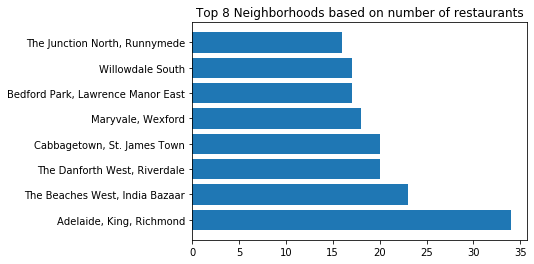

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.barh(top8_df['Neighbourhood'], top8_df['Restaurant_Count'])
plt.title('Top 8 Neighborhoods based on number of restaurants')

Now, in order to get all Pizza Restaurants, we get any venues where the name or the category contains 'Pizza' or similar keywords

In [28]:
pizza_keywords = ['Pizza','Pizzeria']

In [29]:
keyword = re.compile(r'|'.join(pizza_keywords),re.IGNORECASE)
mask = final_df['Venue Category'].apply(lambda x: bool(keyword.search(str(x))))
pizza_df = final_df[mask]
pizza_df.shape


(83, 11)

Now we will use **group_by** to get a count of restaurants in each postal code and save that into a dataframe 

In [30]:
pizza_count = pizza_df.groupby(['PostalCode']).count().reset_index()
pizza_count = pizza_count.loc[:,['PostalCode','Venue']]
pizza_count.rename(columns={'Venue':'Pizza_Count'},inplace=True)
pizza_count.head()

,PostalCode,Pizza_Count
0,M1B,1
1,M1C,1
2,M1G,2
3,M1H,1
4,M1J,2


Now we will create a bar chart to display the top 8 neighborhoods in terms of the number of restaurants.

In [31]:
top8pizza_df = pizza_count.sort_values('Pizza_Count', ascending=False).head(8)
top8pizza_df = pd.merge(top8pizza_df,codes_df,how='inner',on='PostalCode')
top8pizza_df

,PostalCode,Pizza_Count,Borough,Neighbourhood
0,M3N,3,North York,Downsview Northwest
1,M8V,3,Etobicoke,"Humber Bay Shores, Mimico South, New Toronto"
2,M1M,3,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
3,M1N,3,Scarborough,"Birch Cliff, Cliffside West"
4,M4X,3,Downtown Toronto,"Cabbagetown, St. James Town"
5,M9N,3,York,Weston
6,M8W,2,Etobicoke,"Alderwood, Long Branch"
7,M4G,2,East York,Leaside


Text(0.5, 1.0, 'Top 8 Neighborhoods based on number of Pizza restaurants')

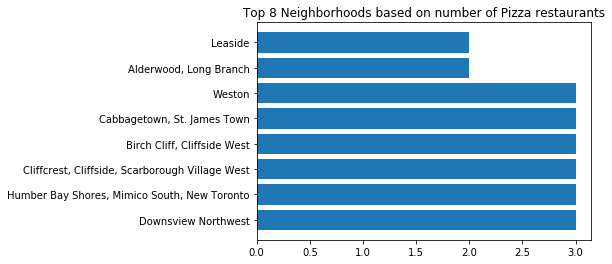

In [36]:
ax = plt.subplot(1,1,1)
ax.barh(top8pizza_df['Neighbourhood'], top8pizza_df['Pizza_Count'])
ax.set_title('Top 8 Neighborhoods based on number of Pizza restaurants')

Now for all these pizza restaurants, we will also fetch their overall rating from Foursquare using another endpoint (venue details)

Creating a function to get overall rating using Venue ID

In [37]:
def getLikesCount(venue_id):

    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    print(url)
    result = requests.get(url).json()
    print(result)
    try:
        likes_count = result['response']['venue']['likes']['count']
    except:
        likes_count = 'NA'
    return likes_count

In [38]:
likes = []
for venue_id in pizza_df['ID']:
    likes_count = getLikesCount(venue_id)
    likes.append(likes_count)

new_pizza_df = pizza_df.copy()
new_pizza_df['Likes'] = likes
new_pizza_df

https://api.foursquare.com/v2/venues/53b6ac2e498ea7ec7d43cd68?client_id=TTEYGX0LFVPEVVOK01103USAWAFK35EH2AIBWYMKBTA0HTRU&client_secret=UNP2CXDYA0NIOCDQ0KJFCXLVJED0E00Z4YMRRGAJCPCCXCV3&v=20200328
{'meta': {'code': 200, 'requestId': '5e8c8cac98205d001bfe0f01'}, 'response': {'venue': {'id': '53b6ac2e498ea7ec7d43cd68', 'name': "Yogi's Pizza & Wings", 'contact': {'phone': '4162086115', 'formattedPhone': '(416) 208-6115'}, 'location': {'address': '400 Sewells Road', 'crossStreet': 'Morningside', 'lat': 43.817001726580074, 'lng': -79.21100425990913, 'labeledLatLngs': [{'label': 'display', 'lat': 43.817001726580074, 'lng': -79.21100425990913}], 'postalCode': 'M1B 5K8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['400 Sewells Road (Morningside)', 'Toronto ON M1B 5K8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/yogis-pizza--wings/53b6ac2e498ea7ec7d43cd68', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName':

{'meta': {'code': 200, 'requestId': '5e8c8dab618f43001b5d80bf'}, 'response': {'venue': {'id': '4f88ecb2e4b0af04c0141561', 'name': "Hartley's Bistro", 'contact': {'phone': '4167820782', 'formattedPhone': '(416) 782-0782'}, 'location': {'address': '1962 Eglinton Avenue West', 'crossStreet': 'Hartley Avenue', 'lat': 43.69510700182834, 'lng': -79.45502012966021, 'labeledLatLngs': [{'label': 'display', 'lat': 43.69510700182834, 'lng': -79.45502012966021}], 'postalCode': 'M6E 4E6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1962 Eglinton Avenue West (Hartley Avenue)', 'Toronto ON M6E 4E6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/hartleys-bistro/4f88ecb2e4b0af04c0141561', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'

{'meta': {'code': 200, 'requestId': '5e8c8d7e216785001bf474e3'}, 'response': {'venue': {'id': '59e8fc2416ef676354d7d76e', 'name': "Domino's Pizza", 'contact': {'phone': '4162893636', 'formattedPhone': '(416) 289-3636'}, 'location': {'address': '789 Markham Rd', 'lat': 43.766995885670305, 'lng': -79.22767422463801, 'labeledLatLngs': [{'label': 'display', 'lat': 43.766995885670305, 'lng': -79.22767422463801}], 'postalCode': 'M1H 2Y1', 'cc': 'CA', 'city': 'Scarborough', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['789 Markham Rd', 'Scarborough ON M1H 2Y1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/dominos-pizza/59e8fc2416ef676354d7d76e', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 0}, 'url': 'https://pizza.dominos.ca/scarborough-ontario

{'meta': {'code': 200, 'requestId': '5e8c8ce90f59680026d6fa75'}, 'response': {'venue': {'id': '4c6de1ace6b7b1f7d842ab8e', 'name': 'Gusto Pizza', 'contact': {'phone': '4162930006', 'formattedPhone': '(416) 293-0006'}, 'location': {'address': '1 Bonis Ave.', 'crossStreet': 'at Birchmount Rd.', 'lat': 43.78360724036883, 'lng': -79.29898327417831, 'labeledLatLngs': [{'label': 'display', 'lat': 43.78360724036883, 'lng': -79.29898327417831}], 'postalCode': 'M1T 2T9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1 Bonis Ave. (at Birchmount Rd.)', 'Toronto ON M1T 2T9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/gusto-pizza/4c6de1ace6b7b1f7d842ab8e', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tie

{'meta': {'code': 200, 'requestId': '5e8c8db247b43d002bf12c3f'}, 'response': {'venue': {'id': '4b623695f964a520913c2ae3', 'name': 'Pizza Pizza', 'contact': {'phone': '4169671111', 'formattedPhone': '(416) 967-1111', 'twitter': 'pizzapizzaltd'}, 'location': {'address': '2500 EGLINTON AVENUE EAST', 'lat': 43.73507309651425, 'lng': -79.25766706466675, 'labeledLatLngs': [{'label': 'display', 'lat': 43.73507309651425, 'lng': -79.25766706466675}], 'postalCode': 'M1K 2R5', 'cc': 'CA', 'city': 'Scarborough', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2500 EGLINTON AVENUE EAST', 'Scarborough ON M1K 2R5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-pizza/4b623695f964a520913c2ae3', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 2}, 'url': 'h

{'meta': {'code': 200, 'requestId': '5e8c8b9a02a1720028602bf5'}, 'response': {'venue': {'id': '4bd3a52db221c9b62055dad0', 'name': "Domino's Pizza", 'contact': {'phone': '4167551144', 'formattedPhone': '(416) 755-1144', 'twitter': 'dominoscanada'}, 'location': {'address': '447 Pharmacy Ave', 'lat': 43.704880554394386, 'lng': -79.28849865874372, 'labeledLatLngs': [{'label': 'display', 'lat': 43.704880554394386, 'lng': -79.28849865874372}], 'postalCode': 'M1L 3G7', 'cc': 'CA', 'city': 'Scarborough', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['447 Pharmacy Ave', 'Scarborough ON M1L 3G7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/dominos-pizza/4bd3a52db221c9b62055dad0', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 0}, 'url': 'https://pizz

{'meta': {'code': 200, 'requestId': '5e8c8cbdb4b684001b234c12'}, 'response': {'venue': {'id': '4eeb68370039490c7d3ddb9d', 'name': 'Double Double Pizza & Chicken', 'contact': {'twitter': 'dbldblpizza'}, 'location': {'address': '2829 Kingston Rd', 'lat': 43.721489952285815, 'lng': -79.23620939254761, 'labeledLatLngs': [{'label': 'display', 'lat': 43.721489952285815, 'lng': -79.23620939254761}], 'postalCode': 'M1M 1N2', 'cc': 'CA', 'city': 'Scarborough', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2829 Kingston Rd', 'Scarborough ON M1M 1N2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/double-double-pizza--chicken/4eeb68370039490c7d3ddb9d', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'url': 'http://www.doubledouble.ca', 'price': {'ti

{'meta': {'code': 200, 'requestId': '5e8c8c3e660a9f001b6c1108'}, 'response': {'venue': {'id': '4d8ba6930c4e41bd10f9667f', 'name': 'Pizza Pizza', 'contact': {'phone': '4169671111', 'formattedPhone': '(416) 967-1111', 'twitter': 'pizzapizzaltd'}, 'location': {'address': '1054 Kingston Road', 'lat': 43.7102, 'lng': -79.24284, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7102, 'lng': -79.24284}], 'postalCode': 'M1N 1N4', 'cc': 'CA', 'city': 'Scarborough', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1054 Kingston Road', 'Scarborough ON M1N 1N4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-pizza/4d8ba6930c4e41bd10f9667f', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 0}, 'url': 'http://www.pizzapizza.ca', 'price': {'tier': 1, 'mess

{'meta': {'code': 200, 'requestId': '5e8c8ddcb57e88001b8d35a8'}, 'response': {'venue': {'id': '4bf193e399d02d7f1b4dc948', 'name': 'Little Caesars Pizza', 'contact': {'phone': '4162662010', 'formattedPhone': '(416) 266-2010', 'twitter': 'littlecaesars', 'facebook': '160513490833', 'facebookUsername': 'LittleCaesars', 'facebookName': 'Little Caesars'}, 'location': {'address': '2475 Kingston Road East Unit 115', 'lat': 43.70982450095888, 'lng': -79.24854146029809, 'labeledLatLngs': [{'label': 'display', 'lat': 43.70982450095888, 'lng': -79.24854146029809}], 'postalCode': 'M1N 1V4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2475 Kingston Road East Unit 115', 'Toronto ON M1N 1V4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/little-caesars-pizza/4bf193e399d02d7f1b4dc948', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/

{'meta': {'code': 200, 'requestId': '5e8c8d511e152c001be67f2a'}, 'response': {'venue': {'id': '4fc3804de4b0264dfd0e047d', 'name': 'Little Caesars Pizza', 'contact': {'phone': '4167504795', 'formattedPhone': '(416) 750-4795', 'twitter': 'littlecaesars'}, 'location': {'address': '2065 Lawrence Ave East', 'lat': 43.745473892980684, 'lng': -79.2943633108266, 'labeledLatLngs': [{'label': 'display', 'lat': 43.745473892980684, 'lng': -79.2943633108266}], 'postalCode': 'M1R 2Z4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2065 Lawrence Ave East', 'Toronto ON M1R 2Z4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/little-caesars-pizza/4fc3804de4b0264dfd0e047d', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 1}, 'url'

{'meta': {'code': 200, 'requestId': '5e8c8cbeb4b684001b234ffd'}, 'response': {'venue': {'id': '5ade361cb8fd9d67df2365f4', 'name': 'Pizza Hot Wings', 'contact': {}, 'location': {'address': '3883 Donmills Road', 'lat': 43.807737, 'lng': -79.356457, 'labeledLatLngs': [{'label': 'display', 'lat': 43.807737, 'lng': -79.356457}], 'postalCode': 'M2H 2S7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3883 Donmills Road', 'Toronto ON M2H 2S7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-hot-wings/5ade361cb8fd9d67df2365f4', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d14c941735', 'name': 'Wings Joint', 'pluralName': 'Wings Joints', 'shortName': 'Wings', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/wings_', 's

{'meta': {'code': 200, 'requestId': '5e8c8d930be7b4001b3b6df7'}, 'response': {'venue': {'id': '4b689d86f964a520f0822be3', 'name': 'Pizza Pizza', 'contact': {'phone': '4169671111', 'formattedPhone': '(416) 967-1111', 'twitter': 'pizzapizzaltd'}, 'location': {'address': '3380 KENNEDY ROAD', 'lat': 43.81816393232666, 'lng': -79.30504560470581, 'labeledLatLngs': [{'label': 'display', 'lat': 43.81816393232666, 'lng': -79.30504560470581}], 'postalCode': 'M1V 3S8', 'cc': 'CA', 'city': 'Scarborough', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3380 KENNEDY ROAD', 'Scarborough ON M1V 3S8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-pizza/4b689d86f964a520f0822be3', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 5}, 'url': 'http://www.pizzap

{'meta': {'code': 200, 'requestId': '5e8c8d5914a126001ba3d081'}, 'response': {'venue': {'id': '52fea4a9498e6da386dd0326', 'name': "Melo's Pizza & Grill", 'contact': {'phone': '4163319333', 'formattedPhone': '(416) 331-9333'}, 'location': {'address': '81 Underhill Drive', 'lat': 43.74621575011826, 'lng': -79.32527998226708, 'labeledLatLngs': [{'label': 'display', 'lat': 43.74621575011826, 'lng': -79.32527998226708}], 'postalCode': 'M3A 2J8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['81 Underhill Drive', 'Toronto ON M3A 2J8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/melos-pizza--grill/52fea4a9498e6da386dd0326', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', '

{'meta': {'code': 200, 'requestId': '5e8c8db0618f43001b5d8f34'}, 'response': {'venue': {'id': '4bfd9166b68d0f47f2f8e857', 'name': 'Pizza Pizza', 'contact': {'phone': '4169671111', 'formattedPhone': '(416) 967-1111'}, 'location': {'address': '618 SHEPPARD AVENUE WEST', 'lat': 43.75531145041057, 'lng': -79.44112566629565, 'labeledLatLngs': [{'label': 'display', 'lat': 43.75531145041057, 'lng': -79.44112566629565}], 'postalCode': 'M3H 2S1', 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['618 SHEPPARD AVENUE WEST', 'North York ON M3H 2S1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-pizza/4bfd9166b68d0f47f2f8e857', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 4}, 'url': 'http://www.pizzapizza.ca', 'price

{'meta': {'code': 200, 'requestId': '5e8c8ccc1835dd001b34d031'}, 'response': {'venue': {'id': '5c53a0aea2a6ce002c9e3806', 'name': 'Pizza Shab', 'contact': {}, 'location': {'lat': 43.656972, 'lng': -79.378484, 'labeledLatLngs': [{'label': 'display', 'lat': 43.656972, 'lng': -79.378484}], 'postalCode': 'M5B 1Y2', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Toronto ON M5B 1Y2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-shab/5c53a0aea2a6ce002c9e3806', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'ma

{'meta': {'code': 200, 'requestId': '5e8c8cb498205d001bfe231d'}, 'response': {'venue': {'id': '4c45a6c4f799e21efa74afa2', 'name': 'Pizza Pizza', 'contact': {'phone': '4169671111', 'formattedPhone': '(416) 967-1111'}, 'location': {'address': '2731 JANE STREET', 'lat': 43.74108518369447, 'lng': -79.51349681782587, 'labeledLatLngs': [{'label': 'display', 'lat': 43.74108518369447, 'lng': -79.51349681782587}], 'postalCode': 'M3L 1S3', 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2731 JANE STREET', 'North York ON M3L 1S3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-pizza/4c45a6c4f799e21efa74afa2', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 0}, 'url': 'http://www.pizzapizza.ca', 'price': {'tier': 1, '

{'meta': {'code': 200, 'requestId': '5e8c8c7e006dce001bb1cc8a'}, 'response': {'venue': {'id': '4ee91cd3e300cc66b42ceede', 'name': 'Pizza Hut', 'contact': {'phone': '4167494313', 'formattedPhone': '(416) 749-4313'}, 'location': {'address': '1949 Finch Avenue W.', 'lat': 43.75633958118749, 'lng': -79.51781778764257, 'labeledLatLngs': [{'label': 'display', 'lat': 43.75633958118749, 'lng': -79.51781778764257}], 'postalCode': 'M3N 2V3', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1949 Finch Avenue W.', 'Toronto ON M3N 2V3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-hut/4ee91cd3e300cc66b42ceede', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Rest

{'meta': {'code': 200, 'requestId': '5e8c8d51ad1ab4001bcab9da'}, 'response': {'venue': {'id': '4b8fe578f964a520106833e3', 'name': 'Pizza Nova', 'contact': {'phone': '4164390000', 'formattedPhone': '(416) 439-0000'}, 'location': {'address': '1733 Eglinton Ave. E', 'crossStreet': 'at Bermondsey Rd.', 'lat': 43.725823726352196, 'lng': -79.31286041792907, 'labeledLatLngs': [{'label': 'display', 'lat': 43.725823726352196, 'lng': -79.31286041792907}], 'postalCode': 'M4A 1J8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1733 Eglinton Ave. E (at Bermondsey Rd.)', 'Toronto ON M4A 1J8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-nova/4b8fe578f964a520106833e3', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 1},

{'meta': {'code': 200, 'requestId': '5e8c8d5247e0d60026fe61e5'}, 'response': {'venue': {'id': '57c16d56498e444b9dbf7dc0', 'name': 'Pizza Pizza', 'contact': {'phone': '4169671111', 'formattedPhone': '(416) 967-1111'}, 'location': {'address': '2795 DANFORTH AVENUE', 'lat': 43.705425770871244, 'lng': -79.3462684750557, 'labeledLatLngs': [{'label': 'display', 'lat': 43.705425770871244, 'lng': -79.3462684750557}], 'postalCode': 'M4C 1M2', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2795 DANFORTH AVENUE', 'Toronto ON M4C 1M2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-pizza/57c16d56498e444b9dbf7dc0', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 0}, 'url': 'http://www.pizzapizza.ca', 'price': {'tier': 1,

{'meta': {'code': 200, 'requestId': '5e8c8ba002a1720028603cf8'}, 'response': {'venue': {'id': '59c3e0caa4236277207f37b4', 'name': 'Pizza Pizza', 'contact': {}, 'location': {'address': 'Wellness Way', 'lat': 43.723344, 'lng': -79.378573, 'labeledLatLngs': [{'label': 'display', 'lat': 43.723344, 'lng': -79.378573}], 'postalCode': 'M4G', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Wellness Way', 'Toronto ON M4G', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-pizza/59c3e0caa4236277207f37b4', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16e941735', 'name': 'Fast Food Restaurant', 'pluralName': 'Fast Food Restaurants', 'shortName': 'Fast Food', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suff

{'meta': {'code': 200, 'requestId': '5e8c8d996001fe001b29d2f7'}, 'response': {'venue': {'id': '4bba24903db7b71318f4229a', 'name': 'Amaro Pizza', 'contact': {'phone': '4165361313', 'formattedPhone': '(416) 536-1313'}, 'location': {'address': '962 Danforth Ave', 'lat': 43.680385, 'lng': -79.338009, 'labeledLatLngs': [{'label': 'display', 'lat': 43.680385, 'lng': -79.338009}], 'postalCode': 'M4J 1L9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['962 Danforth Ave', 'Toronto ON M4J 1L9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/amaro-pizza/4bba24903db7b71318f4229a', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'url': 'http://www.amaropizza.com', 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'},

{'meta': {'code': 200, 'requestId': '5e8c8d5447e0d60026fe66af'}, 'response': {'venue': {'id': '5998aa934940bc4de5bfdaca', 'name': 'North Of Brooklyn Pizzeria', 'contact': {}, 'location': {'lat': 43.669467, 'lng': -79.439335, 'labeledLatLngs': [{'label': 'display', 'lat': 43.669467, 'lng': -79.439335}], 'postalCode': 'M6H', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Toronto ON M6H', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/north-of-brooklyn-pizzeria/5998aa934940bc4de5bfdaca', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 4, 'groups': [{'type': 'others', 'count': 4, 'items': [{'id': '38290757', 'firstName': 'Cansin', 'last

{'meta': {'code': 200, 'requestId': '5e8c8d8d0de0d90023206518'}, 'response': {'venue': {'id': '5cafa7a759c423002c4e02a2', 'name': 'Blondies', 'contact': {}, 'location': {'address': '199 Bay St', 'lat': 43.648129, 'lng': -79.37946, 'labeledLatLngs': [{'label': 'display', 'lat': 43.648129, 'lng': -79.37946}], 'postalCode': 'M5L 2W4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['199 Bay St', 'Toronto ON M5L 2W4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/blondies/5cafa7a759c423002c4e02a2', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1f9941735', 'name': 'Food & Drink Shop', 'pluralName': 'Food & Drink Shops', 'shortName': 'Food & Drink', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/foodanddrink_', 'suffix

{'meta': {'code': 200, 'requestId': '5e8c8d71c546f3001b470718'}, 'response': {'venue': {'id': '4da8bc62fa8cc76497075931', 'name': 'Pizza Hut', 'contact': {'phone': '4162352505', 'formattedPhone': '(416) 235-2505', 'twitter': 'pizzahutcanada'}, 'location': {'address': '1564 Royal York Rd', 'lat': 43.69643127748791, 'lng': -79.53323325309887, 'labeledLatLngs': [{'label': 'display', 'lat': 43.69643127748791, 'lng': -79.53323325309887}], 'postalCode': 'M9P 3C3', 'cc': 'CA', 'city': 'Etobicoke', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1564 Royal York Rd', 'Etobicoke ON M9P 3C3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-hut/4da8bc62fa8cc76497075931', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Res

{'meta': {'code': 200, 'requestId': '5e8c8d2ab9a389001bc4e32d'}, 'response': {'venue': {'id': '58081cc238fa872d3b31c0cf', 'name': 'Superpoint', 'contact': {'phone': '4165196996', 'formattedPhone': '(416) 519-6996', 'twitter': 'superpoint184', 'instagram': 'superpoint184'}, 'location': {'address': '184 Ossington Ave', 'crossStreet': 'at Halton St', 'lat': 43.648438964819064, 'lng': -79.42051429823161, 'labeledLatLngs': [{'label': 'display', 'lat': 43.648438964819064, 'lng': -79.42051429823161}], 'postalCode': 'M6J 2Z7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['184 Ossington Ave (at Halton St)', 'Toronto ON M6J 2Z7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/superpoint/58081cc238fa872d3b31c0cf', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}, {'

{'meta': {'code': 200, 'requestId': '5e8c8bfadd0f85002800270d'}, 'response': {'venue': {'id': '519101a6498ef8b472817abf', 'name': '2 for 1 Pizza', 'contact': {'phone': '4162437450', 'formattedPhone': '(416) 243-7450'}, 'location': {'address': '1986 Weston Rd', 'lat': 43.700981756145964, 'lng': -79.519069567889, 'labeledLatLngs': [{'label': 'display', 'lat': 43.700981756145964, 'lng': -79.519069567889}], 'postalCode': 'M9N 1W2', 'cc': 'CA', 'city': 'York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1986 Weston Rd', 'York ON M9N 1W2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/2-for-1-pizza/519101a6498ef8b472817abf', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'

{'meta': {'code': 200, 'requestId': '5e8c8c82006dce001bb1d87a'}, 'response': {'venue': {'id': '5d605cd73fd78b0008439acf', 'name': 'Metro Pizza & Chicken', 'contact': {'phone': '4166533333', 'formattedPhone': '(416) 653-3333'}, 'location': {'address': '1856 Keele St', 'lat': 43.690685, 'lng': -79.474038, 'labeledLatLngs': [{'label': 'display', 'lat': 43.690685, 'lng': -79.474038}], 'postalCode': 'M6M 3X5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1856 Keele St', 'Toronto ON M6M 3X5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/metro-pizza--chicken/5d605cd73fd78b0008439acf', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'url': 'http://metropizzachicken.ca', 'price': {'tier': 1, 'message': 'Cheap', 'c

{'meta': {'code': 200, 'requestId': '5e8c8c9695feaf001b45c703'}, 'response': {'venue': {'id': '5dc9ed49fd14600007103e39', 'name': 'Pizza Hut', 'contact': {'phone': '4167699333', 'formattedPhone': '(416) 769-9333'}, 'location': {'address': '2575 St Clair Ave W, Unit #3', 'lat': 43.667396, 'lng': -79.488875, 'labeledLatLngs': [{'label': 'display', 'lat': 43.667396, 'lng': -79.488875}], 'postalCode': 'M6N 4Z5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2575 St Clair Ave W, Unit #3', 'Toronto ON M6N 4Z5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-hut/5dc9ed49fd14600007103e39', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'coun

{'meta': {'code': 200, 'requestId': '5e8c8d2cb9a389001bc4e85b'}, 'response': {'venue': {'id': '56134c68498e7c43cb1f0dd1', 'name': 'Pizzaiolo', 'contact': {'phone': '4162312211', 'formattedPhone': '(416) 231-2211'}, 'location': {'address': '383 Roncesvalles Avenue', 'lat': 43.65042233319782, 'lng': -79.45074564574136, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65042233319782, 'lng': -79.45074564574136}], 'postalCode': 'M6R 2M8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['383 Roncesvalles Avenue', 'Toronto ON M6R 2M8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizzaiolo/56134c68498e7c43cb1f0dd1', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'url': 'http://www.pizzaiolo.ca', 'price': {'tier': 

{'meta': {'code': 200, 'requestId': '5e8c8c4f40a7ea001c5b2575'}, 'response': {'venue': {'id': '4e1f329fae60cd553deeb4a0', 'name': "Domino's Pizza", 'contact': {'phone': '4162510999', 'formattedPhone': '(416) 251-0999', 'twitter': 'dominoscanada'}, 'location': {'address': '2811 Lake Shore Blvd W', 'crossStreet': 'Third Street', 'lat': 43.60158294371704, 'lng': -79.50090463107409, 'labeledLatLngs': [{'label': 'display', 'lat': 43.60158294371704, 'lng': -79.50090463107409}], 'postalCode': 'M8V 1H6', 'cc': 'CA', 'city': 'Etobicoke', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2811 Lake Shore Blvd W (Third Street)', 'Etobicoke ON M8V 1H6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/dominos-pizza/4e1f329fae60cd553deeb4a0', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': 

{'meta': {'code': 200, 'requestId': '5e8c8c68963d29001ba626e4'}, 'response': {'venue': {'id': '4c47927c1ddec928fbec9d32', 'name': 'Il Paesano Pizzeria & Restaurant', 'contact': {'phone': '4162517080', 'formattedPhone': '(416) 251-7080'}, 'location': {'address': '396 Browns Line', 'crossStreet': 'at Horner Ave', 'lat': 43.60128, 'lng': -79.545028, 'labeledLatLngs': [{'label': 'display', 'lat': 43.60128, 'lng': -79.545028}], 'postalCode': 'M8W 3T8', 'cc': 'CA', 'city': 'Etobicoke', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['396 Browns Line (at Horner Ave)', 'Etobicoke ON M8W 3T8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/il-paesano-pizzeria--restaurant/4c47927c1ddec928fbec9d32', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 12}, 'url

{'meta': {'code': 200, 'requestId': '5e8c8d637828ae001be126b1'}, 'response': {'venue': {'id': '4b3e3d4ef964a520ff9925e3', 'name': 'Pizza Nova', 'contact': {'phone': '4164390000', 'formattedPhone': '(416) 439-0000'}, 'location': {'address': '129 Martin Grove', 'crossStreet': 'at Burnhamthorpe', 'lat': 43.649092, 'lng': -79.549, 'labeledLatLngs': [{'label': 'display', 'lat': 43.649092, 'lng': -79.549}], 'postalCode': 'M9B 4K8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['129 Martin Grove (at Burnhamthorpe)', 'Toronto ON M9B 4K8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-nova/4b3e3d4ef964a520ff9925e3', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 2}, 'url': 'http://www.pizzanova.com', 'price': {'tie

{'meta': {'code': 200, 'requestId': '5e8c8c1f29ce6a001b6fa45a'}, 'response': {'venue': {'id': '4ba2faf2f964a520162638e3', 'name': 'Pizza Pizza', 'contact': {'phone': '4169671111', 'formattedPhone': '(416) 967-1111'}, 'location': {'address': '1735 Kipling Avenue', 'lat': 43.69321312231725, 'lng': -79.55729000271057, 'labeledLatLngs': [{'label': 'display', 'lat': 43.69321312231725, 'lng': -79.55729000271057}], 'postalCode': 'M9R 2Y8', 'cc': 'CA', 'city': 'Etobicoke', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1735 Kipling Avenue', 'Etobicoke ON M9R 2Y8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizza-pizza/4ba2faf2f964a520162638e3', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 0}, 'url': 'http://www.pizzapizza.ca', 'price': {'tier': 

{'meta': {'code': 200, 'requestId': '5e8c8d9f6001fe001b29e180'}, 'response': {'venue': {'id': '56f06ae2498e8cfec8536df1', 'name': "Domino's Pizza", 'contact': {'phone': '4166228222', 'formattedPhone': '(416) 622-8222'}, 'location': {'address': '460 Renforth Drive Unit #11', 'crossStreet': 'Rathburn', 'lat': 43.65070938738325, 'lng': -79.58040115579297, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65070938738325, 'lng': -79.58040115579297}], 'postalCode': 'M9C 2N2', 'cc': 'CA', 'city': 'Etobicoke', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['460 Renforth Drive Unit #11 (Rathburn)', 'Etobicoke ON M9C 2N2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/dominos-pizza/56f06ae2498e8cfec8536df1', 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount'

,ID,Neighborhood,PostalCode,Venue,Venue Category,Venue Latitude,Venue Longitude,Borough,Neighbourhood,Latitude,Longitude,Likes
53,53b6ac2e498ea7ec7d43cd68,Upper Rouge,M1B,Yogi's Pizza & Wings,Pizza Place,43.817002,-79.211004,Scarborough,"Rouge, Malvern",43.806686,-79.194353,0
65,5e7401a3948c0000083f2b08,"Highland Creek, Rouge Hill, Port Union",M1C,Mark’s Pizzas,Pizza Place,43.783293,-79.169771,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,0
102,4b5a2f4ff964a520b7b228e3,"The Beaches West, India Bazaar",M4L,Pizzaiolo,Pizza Place,43.668953,-79.311683,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,4
137,4bcb794f3740b71390996265,Business Reply Mail Processing Centre 969 Eastern,M4L,Queen Margherita Pizza,Pizza Place,43.664685,-79.324164,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,86
191,4f88ecb2e4b0af04c0141561,Caledonia-Fairbanks,M6E,Hartley's Bistro,Pizza Place,43.695107,-79.455020,York,Caledonia-Fairbanks,43.689026,-79.453512,0
242,4c097c1bbbc676b0674a48d5,Woburn,M1G,Pizza Nova,Pizza Place,43.776973,-79.229830,Scarborough,Woburn,43.770992,-79.216917,0
247,4f4825e1e4b0a69abbdba081,Woburn,M1G,Domino's Pizza,Pizza Place,43.762819,-79.209623,Scarborough,Woburn,43.770992,-79.216917,2
260,59e8fc2416ef676354d7d76e,Woburn,M1H,Domino's Pizza,Pizza Place,43.766996,-79.227674,Scarborough,Cedarbrae,43.773136,-79.239476,1
417,4e2b4705d164223a69808a57,"Clarks Corners, Sullivan, Tam O'Shanter",M1T,Little Caesars Pizza,Pizza Place,43.780563,-79.298624,Scarborough,"Clarks Corners, Sullivan, Tam O'Shanter",43.781638,-79.304302,5
420,4c6de1ace6b7b1f7d842ab8e,"Clarks Corners, Sullivan, Tam O'Shanter",M1T,Gusto Pizza,Pizza Place,43.783607,-79.298983,Scarborough,"Clarks Corners, Sullivan, Tam O'Shanter",43.781638,-79.304302,1


Now we will create a **histogram** to analyze the number of Likes

Text(0.5, 0, 'Number of Likes')

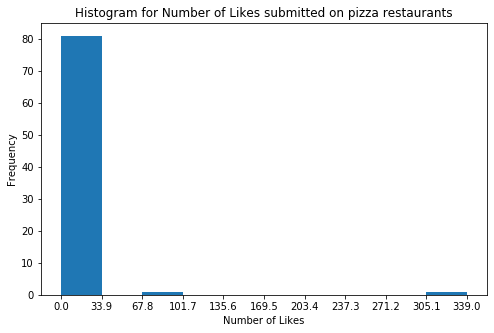

In [39]:
count, bin_edges = np.histogram(new_pizza_df['Likes'])
new_pizza_df['Likes'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram for Number of Likes submitted on pizza restaurants')
plt.xlabel('Number of Likes')

Any value over 33 can be considered an outlier. If we include it in our dataset, it would significantly skew the result in the favor of that neighborhood. In order to present more balanced clustering of neighborhoods, we will cap the values at 33.

In [40]:
new_pizza_df.loc[new_pizza_df['Likes'] > 33,'Likes'] = 33

Now we will use **group_by** to get a mean number of Likes in each postal code and save that into a dataframe 

In [41]:
pizza_like_count = new_pizza_df.groupby(['PostalCode']).mean()['Likes'].reset_index()

Now we will use a bar chart to show the top 8 neighborhoods based on the mean number of likes

In [42]:
likes_df = pizza_like_count.sort_values('Likes',ascending=False).head(8)
likes_df = pd.merge(likes_df, codes_df, how='inner', on='PostalCode')
likes_df

,PostalCode,Likes,Borough,Neighbourhood
0,M6J,31.0,West Toronto,"Little Portugal, Trinity"
1,M4S,26.0,Central Toronto,Davisville
2,M4L,18.5,East Toronto,"The Beaches West, India Bazaar"
3,M8W,9.5,Etobicoke,"Alderwood, Long Branch"
4,M5J,9.0,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station"
5,M2R,6.0,North York,Willowdale West
6,M2N,5.0,North York,Willowdale South
7,M6H,4.0,West Toronto,"Dovercourt Village, Dufferin"


Text(0.5, 0, 'Mean number of likes')

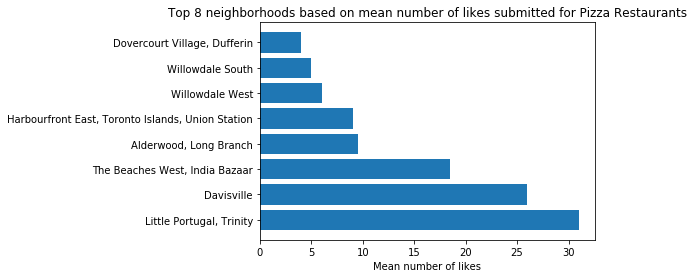

In [43]:
pizza_like_count.sort_values('Likes',ascending=False).head(8) 
ax = plt.subplot(1,1,1)
ax.barh(likes_df['Neighbourhood'],likes_df['Likes'])
plt.title('Top 8 neighborhoods based on mean number of likes submitted for Pizza Restaurants')
plt.xlabel('Mean number of likes')


Now building our feature set consisting of number of Restaurants, number of Pizza Restaurants and mean number of Likes for each postal code.

In [44]:
pizza_like_count = new_pizza_df.groupby(['PostalCode']).mean()['Likes'].reset_index()

In [45]:
features_df = pd.merge(codes_df, restaurant_count, how='left', on='PostalCode')
features_df = pd.merge(features_df, pizza_count, how='left', on='PostalCode')
features_df = pd.merge(features_df, pizza_like_count, how='left', on='PostalCode')
features_df.head()

,PostalCode,Borough,Neighbourhood,Restaurant_Count,Pizza_Count,Likes
0,M1B,Scarborough,"Rouge, Malvern",12.0,1.0,0.0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",6.0,1.0,0.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",9.0,NaN,NaN
3,M1G,Scarborough,Woburn,5.0,2.0,1.0
4,M1H,Scarborough,Cedarbrae,14.0,1.0,1.0


Now we will take a look at the missing values and resolve them.

In [46]:
features_df = features_df.fillna(0).sort_index()

Now we will apply KMeans clustering algorithm on the feature set

First extract feature set and normalize it

In [47]:
features = features_df.loc[:,['Restaurant_Count','Pizza_Count','Likes']].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features)

Now apply KMeans Algorithm and divide the features into clusters. We will use the **Elbow method** to get the optimal number of clusters.

In [48]:
# import k-means 
from sklearn.cluster import KMeans
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)



Text(0.5, 1.0, 'Sum of squared error vs number of clusters')

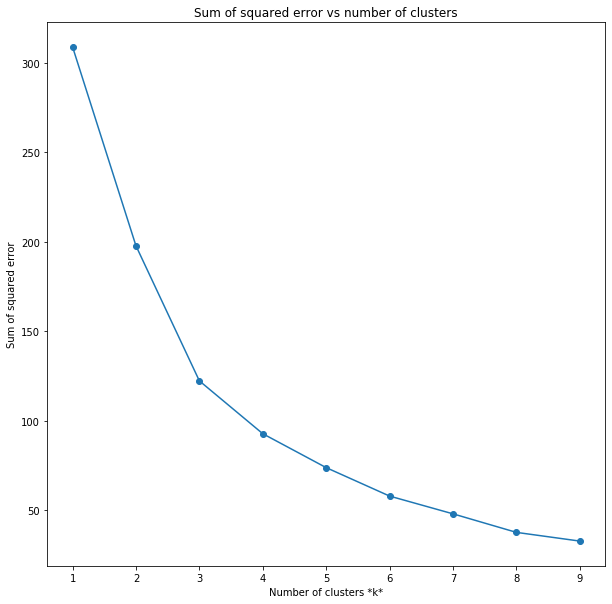

In [49]:
# Plot sse against k
plt.figure(figsize=(10, 10))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared error')
plt.title('Sum of squared error vs number of clusters')

For the above plot, it can be seen that the sum of squared error (distance) decreases rapidly until k=3 and then it flattens out. We will select k=4 for the number of clusters.

In [50]:
k_clusters = 4
# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(X)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels.shape

(103,)

In [51]:
features_df['Labels'] = labels
features_df

,PostalCode,Borough,Neighbourhood,Restaurant_Count,Pizza_Count,Likes,Labels
0,M1B,Scarborough,"Rouge, Malvern",12.0,1.0,0.000000,0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",6.0,1.0,0.000000,1
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",9.0,0.0,0.000000,0
3,M1G,Scarborough,Woburn,5.0,2.0,1.000000,2
4,M1H,Scarborough,Cedarbrae,14.0,1.0,1.000000,0
5,M1J,Scarborough,Scarborough Village,6.0,2.0,0.000000,2
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",5.0,2.0,0.000000,2
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",9.0,1.0,3.000000,0
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",6.0,3.0,1.666667,2
9,M1N,Scarborough,"Birch Cliff, Cliffside West",14.0,3.0,0.666667,2


The best neighborhood for Pizza restaurants based on the features (extracted from FourSquare) is **Little Portugal**, Trinity in West Toronto

In [52]:
clusters_df = features_df.groupby('Labels').mean()

Text(0.5, 1.0, 'Difference between Clusters')

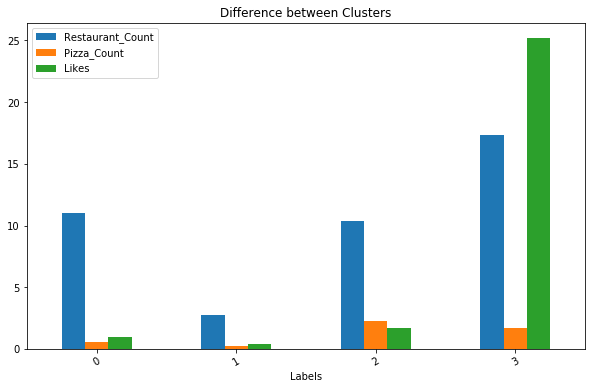

In [53]:
clusters_df.plot(kind='bar', figsize=(10,6))
plt.xticks(rotation=30)
plt.title('Difference between Clusters')

In [54]:
features_df.loc[features_df['Labels']==3]

,PostalCode,Borough,Neighbourhood,Restaurant_Count,Pizza_Count,Likes,Labels
42,M4L,East Toronto,"The Beaches West, India Bazaar",23.0,2.0,18.5,3
47,M4S,Central Toronto,Davisville,13.0,1.0,26.0,3
77,M6J,West Toronto,"Little Portugal, Trinity",16.0,2.0,31.0,3


Now we will visualize the clusters on a map of Toronto.

In [55]:
# create map
import folium
latitude, longitude = 43.65,-79.38
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
map_clusters

In [56]:
map_df = pd.merge(features_df, geo_df, how='left', on='PostalCode')

In [57]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

x = np.arange(k_clusters)
ys = [i + x + (i*x)**3 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)


['#8000ff', '#2adddd', '#d4dd80', '#ff0000']


In [58]:
# add markers to the map

for lat, lon, poi, cluster in zip(map_df['Latitude'], map_df['Longitude'], map_df['Neighbourhood'], map_df['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-fymr{font-weight:bold;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-fymr">Color</th>
    <th class="tg-1wig">Cluster</th>
  </tr>
   <tr>
    <td class="tg-0lax" bgcolor='#ff0000'></td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax" bgcolor='#8000ff'></td>
    <td class="tg-0lax">1</td>
  </tr>
    <tr>
    <td class="tg-0lax" bgcolor='2adddd'></td>
    <td class="tg-0lax">2</td>
  </tr>
  <tr>
    <td class="tg-0lax" bgcolor='#d4dd80'></td>
    <td class="tg-0lax">3</td>
  </tr>

</table>

In [59]:
cluster3_df= map_df.loc[features_df['Labels']==3]
cluster3_df


,PostalCode,Borough,Neighbourhood,Restaurant_Count,Pizza_Count,Likes,Labels,Latitude,Longitude
42,M4L,East Toronto,"The Beaches West, India Bazaar",23.0,2.0,18.5,3,43.668999,-79.315572
47,M4S,Central Toronto,Davisville,13.0,1.0,26.0,3,43.704324,-79.388790
77,M6J,West Toronto,"Little Portugal, Trinity",16.0,2.0,31.0,3,43.647927,-79.419750


In [60]:
latitude, longitude = 43.65,-79.38
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lon, poi, cluster in zip(cluster3_df['Latitude'], cluster3_df['Longitude'], cluster3_df['Neighbourhood'], cluster3_df['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#ff0000',
        fill=True,
        fill_color='#ff0000',
        fill_opacity=0.7).add_to(map_clusters)
    #folium.Marker([lat, lng], popup=label).add_to(map_clusters)
     
map_clusters